In [1]:
import pandas as pd
import openpyxl as ox
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
import os
os.getcwd()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## start data exploration
## read xlsx file from current directory under folder 01Data
data_apt_time = pd.read_excel('03ExportedData/time_series_with_hp_updated1105.xlsx')
data_apt_ht= pd.read_excel('./03ExportedData/final_apt_trade_address_classification_1024_2025.xlsx')
data_alidu = pd.read_excel('./01Data/Seattle_HP_unit_apartment only_Unique address.xlsx')

In [4]:
data_all_trade = pd.read_csv('./01Data/Trade_Permits_20251003.csv')

In [5]:
## read the file with apt and whether 


In [6]:

data_apt_time.describe()
data_apt_time.head()
data_apt_time['coverage_classification_tonnage'].value_counts()
data_apt_time['coverage_classification_units'].describe()




## make index based on  Quarter_ts
# data_apt_time = data_apt_time.set_index('Quarter_ts1')


AskingRentPerUnit  AskingRentPerSF  AskingRentGrowthYr  \
count       42640.000000     42066.000000        41782.000000   
mean         1530.470655         2.487507            0.024931   
min           266.898310         0.321177           -0.499323   
25%          1075.179800         1.725627            0.002078   
50%          1442.052000         2.355342            0.019272   
75%          1899.212400         3.058510            0.046416   
max          6484.115200        15.816058            1.176453   
std           615.426545         1.049359            0.066653   

       EffectiveRentPerUnit  EffectiveRentPerSF  EffectiveRentGrowthYr  \
count          42640.000000        42066.000000           41782.000000   
mean            1508.633250            2.453179               0.024683   
min              265.525420            0.319525              -0.475113   
25%             1066.565500            1.711783              -0.002209   
50%             1427.160350            2.321660               0.018926   
75%             1864.098000            3.005473               0.051315   
max             6394.874300           15.811394               1.167517   
std              598.498217            1.029061               0.077218   

       VacancyUnits  VacancyTotal  StarRating_x      ES  ...  \
count  48522.000000  48522.000000  48600.000000  2514.0  ...   
mean       8.217200      0.072948      3.396914     1.0  ...   
min        0.000000      0.000000      2.000000     1.0  ...   
25%        1.267725      0.026673      3.000000     1.0  ...   
50%        3.000100      0.047335      3.000000     1.0  ...   
75%        7.588175      0.074968      4.000000     1.0  ...   
max      627.999200      1.000000      5.000000     1.0  ...   
std       21.547122      0.109873      0.626012     0.0  ...   

       compressors_final  compressors_final_cumsum    HP_related  \
count        1225.000000               1225.000000  48600.000000   
mean            6.446531                 13.940408      0.221605   
min             0.000000                  0.000000      0.000000   
25%             1.000000                  2.000000      0.000000   
50%             2.000000                  5.000000      0.000000   
75%             4.000000                 12.000000      0.000000   
max           329.000000                330.000000      1.000000   
std            25.420303                 33.568638      0.415331   

       common_area_only  Number_final_cumsum   confidence  \
count               0.0         6.430000e+02  1225.000000   
mean                NaN         9.623020e+03     0.925991   
min                 NaN         0.000000e+00     0.490762   
25%                 NaN         2.000000e+00     1.000000   
50%                 NaN         5.000000e+00     1.000000   
75%                 NaN         1.100000e+01     1.000000   
max                 NaN         3.076437e+06     1.000000   
std                 NaN         1.714399e+05     0.157450   

                      Completed Date              Completed Quarter  \
count                           1225                          11238   
mean   2016-09-23 23:51:46.285714176  2014-08-07 22:23:53.849439488   
min              2003-02-04 00:00:00            2003-02-04 00:00:00   
25%              2014-02-04 00:00:00            2011-07-18 00:00:00   
50%              2017-05-25 00:00:00            2015-08-11 00:00:00   
75%              2020-01-22 00:00:00            2018-03-23 00:00:00   
max              2023-12-29 00:00:00            2023-12-29 00:00:00   
std                              NaN                            NaN   

       HP_installed  HP_covered_residential_units  
count   48600.00000                  48600.000000  
mean        0.22144                      0.088292  
min         0.00000                      0.000000  
25%         0.00000                      0.000000  
50%         0.00000                      0.000000  
75%         0.00000                      0.000000  
max       

Number_x  Quarter    Status  AskingRentPerUnit  AskingRentPerSF  \
0  MASEA210  2019 Q2  Existing          2537.6290         2.870085   
1  MASEA210  2019 Q3  Existing          2452.6613         2.773771   
2  MASEA210  2019 Q4  Existing          2470.6613         2.793810   
3  MASEA210  2020 Q1  Existing          2505.4516         2.832279   
4  MASEA210  2020 Q2  Existing          2542.4194         2.873854   

   AskingRentGrowthYr  EffectiveRentPerUnit  EffectiveRentPerSF  \
0           -0.006353             2388.7258            2.701834   
1           -0.044884             2373.8387            2.684635   
2           -0.041690             2470.5323            2.793678   
3           -0.033379             2475.5323            2.798470   
4            0.001888             2293.3710            2.593208   

   EffectiveRentGrowthYr  VacancyUnits  ...  PermitNum Completed Date  \
0              -0.064611       39.2134  ...        NaN            NaT   
1              -0.075509       11.9994  ...        NaN            NaT   
2              -0.041728        7.7772  ...        NaN            NaT   
3              -0.044886        2.7220  ...        NaN            NaT   
4              -0.039919        2.7364  ...        NaN            NaT   

  Completed Quarter         coverage_filled         predicted_label  \
0               NaT  No Heat Pump Installed  No Heat Pump Installed   
1               NaT  No Heat Pump Installed  No Heat Pump Installed   
2               NaT  No Heat Pump Installed  No Heat Pump Installed   
3               NaT  No Heat Pump Installed  No Heat Pump Installed   
4               NaT  No Heat Pump Installed  No Heat Pump Installed   

   is_before  is_after  is_same_or_after HP_installed  \
0      False     False             False            0   
1      False     False             False            0   
2      False     False             False            0   
3      False     False             False            0   
4      False     False             False            0   

  HP_covered_residential_units  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 163 columns]

coverage_classification_tonnage
Uncertain            579
Partial Coverage     386
Common Areas Only    199
Whole Building        61
Name: count, dtype: int64

count                  1225
unique                    4
top       Common Areas Only
freq                    687
Name: coverage_classification_units, dtype: object

In [7]:
### check if all data_apt_time['Number'] can be both 'Yes' and 'No' in the column of 'has heat pump'
## get the unique Number that has 'Yes'in the column of 'has heat pump'
yes_numbers = data_apt_time[data_apt_time['HP_related'] == 1]['addr_clean'].unique()
## get the unique Number that has 'No'in the column of 'has heat pump'
no_numbers = data_apt_time[data_apt_time['HP_related'] == 0]['addr_clean'].unique()
## check if there are any overlaps in the two sets of unique Number
set(yes_numbers).intersection(set(no_numbers)).__len__()


197

#### make the uncertain into common areas only

In [8]:
### for coverage_filled1, make a new column coverage_filled2 that make all 'Uncertain' to 'Common Areas Only'
data_apt_time['coverage_filled2'] = data_apt_time['coverage_filled'].replace('Uncertain', 'Common Areas Only')
data_apt_time['coverage_filled2'].value_counts()

## make sure tha

coverage_filled2
No Heat Pump Installed    37362
Common Areas Only          7583
Partial Coverage           3375
Whole Building              280
Name: count, dtype: int64

There are 199 unique buildings in the permit system (has heatpump)

So most of the 'has heat pump' in this will be 'no'

Within the missing Number set, there are no overlaps in Numbers between those that say has heat pump and those say has no heatpump. There are 507 unique buildings say no and 224 unique buildings say yes to the heatpump problem.

## Try visualize over time for different columns
AskingRentPerUnit	AskingRentPerSF	AskingRentGrowthYr	EffectiveRentPerUnit	EffectiveRentPerSF	EffectiveRentGrowthYr


In [9]:
import pandas as pd
# ## remove white space of '2000 Q1' to '2000Q1'

data_apt_time['Quarter1'] = data_apt_time['Quarter'].str.replace('QTD', '').str.replace(' ', '')
data_apt_time['Quarter1'].value_counts() 
data_apt_time['Quarter1'] = pd.PeriodIndex(
    data_apt_time['Quarter1'],
    freq='Q'
)

## make index on 'Quarter1'
# data_apt_time = data_apt_time.set_index('Quarter1', append=True)

data_apt_time['HP_related'] = data_apt_time['HP_related'].fillna(0).astype(int)
data_apt_time['addr_clean'].groupby(data_apt_time['Quarter1']).size()

data_apt_time['HP_installed'] = np.where(data_apt_time['coverage_filled'].isin(['No Heat Pump Installed']), 0, 1) *  data_apt_time['HP_related']
data_apt_time['HP_installed'].value_counts()


Quarter1
2023Q3    962
2023Q4    953
2023Q2    940
2023Q1    939
2022Q4    923
         ... 
2000Q4    259
2001Q1    259
2000Q3    257
2000Q2    253
2000Q1    250
Name: count, Length: 96, dtype: int64

Quarter1
2000Q1    250
2000Q2    253
2000Q3    257
2000Q4    259
2001Q1    259
         ... 
2022Q4    923
2023Q1    939
2023Q2    940
2023Q3    962
2023Q4    953
Freq: Q-DEC, Name: addr_clean, Length: 96, dtype: int64

HP_installed
0    37830
1    10770
Name: count, dtype: int64

In [10]:
data_apt_time['HP_related'].value_counts()

HP_related
0    37830
1    10770
Name: count, dtype: int64

In [11]:

data_apt_time['Quarter1'].dtype
data_apt_time['Quarter_ts'] = data_apt_time['Quarter1'].dt.to_timestamp()

### drop duplicates based on addr_clean and Quarter_ts, keep the last one
data_apt_time = data_apt_time.drop_duplicates(subset=['addr_clean', 'Quarter_ts'], keep='last')
data_apt_time.info()


## check how many HP_installed in each Quarter
t = data_apt_time.groupby(['Quarter_ts', 'HP_installed']).size().unstack(fill_value=0)

t[t[1]>0]


period[Q-DEC]

<class 'pandas.core.frame.DataFrame'>
Index: 47855 entries, 0 to 48599
Columns: 166 entries, Number_x to Quarter_ts
dtypes: bool(3), datetime64[ns](4), float64(74), int64(6), object(78), period[Q-DEC](1)
memory usage: 60.0+ MB


HP_installed    0    1
Quarter_ts            
2003-01-01    282    1
2003-04-01    283    2
2003-07-01    282    4
2003-10-01    281    5
2004-01-01    283    6
...           ...  ...
2022-10-01    593  318
2023-01-01    598  323
2023-04-01    600  328
2023-07-01    603  336
2023-10-01    601  342

[84 rows x 2 columns]

<Axes: xlabel='Quarter_ts'>

Text(0.5, 1.0, 'Number of Apartment Buildings with and without Heat Pumps by Quarter')

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Number of Apartment Buildings')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 [Text(0, 0, '2003-01-01 00:00:00'),
  Text(1, 0, '2003-04-01 00:00:00'),
  Text(2, 0, '2003-07-01 00:00:00'),
  Text(3, 0, '2003-10-01 00:00:00'),
  Text(4, 0, '2004-01-01 00:00:00'),
  Text(5, 0, '2004-04-01 00:00:00'),
  Text(6, 0, '2004-07-01 00:00:00'),
  Text(7, 0, '2004-10-01 00:00:00'),
  Text(8, 0, '2005-01-01 00:00:00'),
  Text(9, 0, '2005-04-01 00:00:00'),
  Text(10, 0, '2005-07-01 00:00:00'),
  Text(11, 0, '2005-10-01 00:00:00'),
  Text(12, 0, '2006-01-01 00:00:00'),
  Text(13, 0, '2006-04-01 00:00:00'),
  Text(14, 0, '2006-07-01 00:00:00'),
  Text(15, 0, '2006-10-01 00:00:00'),
  Text(16, 0, '2007-01-0

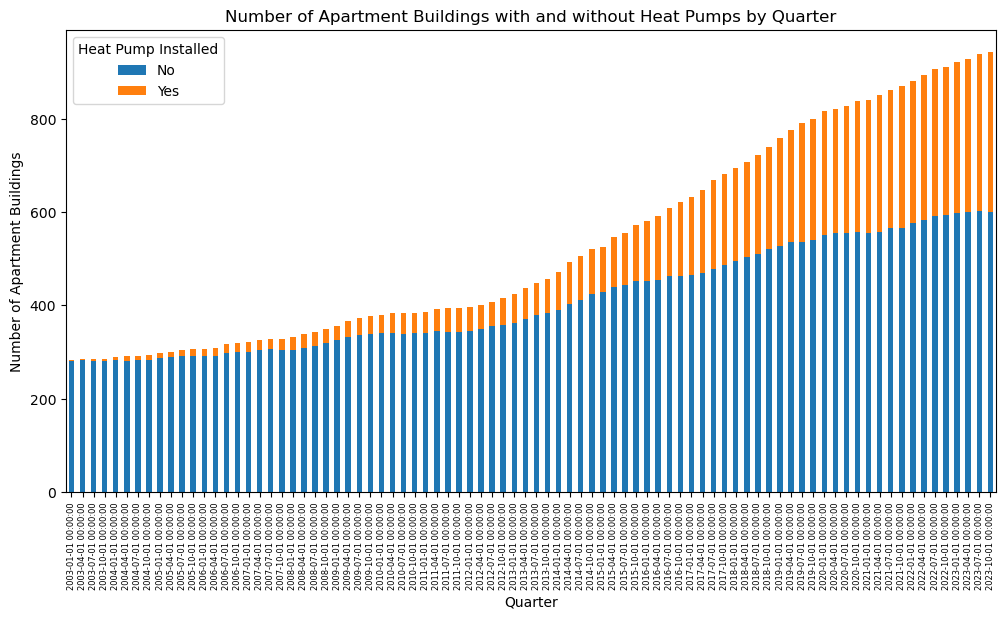

In [12]:
## plot the table t as a stacked bar chart
import matplotlib.pyplot as plt
t[t[1]>0].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Apartment Buildings with and without Heat Pumps by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Apartment Buildings')
plt.legend(title='Heat Pump Installed', labels=['No', 'Yes'])
plt.xticks(rotation=90, fontsize = 6)
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Quarter_ts', ylabel='AskingRentPerSF'>

Text(0.5, 1.0, 'Asking Rent Per SQFT by Quarter and Heat Pump Status')

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Asking Rent Per SQFT')

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024')])

c:\ProgramData\miniconda3\envs\ml-data-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


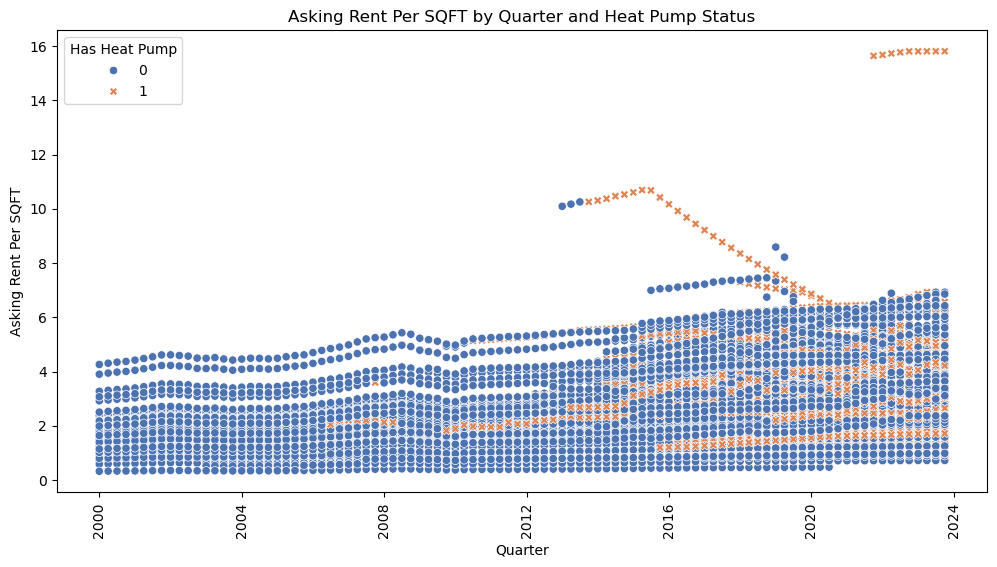

In [13]:
## make a plot of the data_apt_time data, with 'Quarter_ts' as x axis(period[Q-DEC]) and 'AskingRentPerSF' as y axis, color by 'has heat pump', 
## make the x axis as time series with vertical lines for each year and the text orientation of the x axis labels as vertical

import matplotlib.pyplot as plt
import seaborn as sns  


plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_apt_time, x='Quarter_ts', y='AskingRentPerSF', hue='HP_installed', style='HP_installed', palette='deep')
plt.title('Asking Rent Per SQFT by Quarter and Heat Pump Status')
plt.xlabel('Quarter')
plt.ylabel('Asking Rent Per SQFT')
plt.legend(title='Has Heat Pump')
plt.xticks(rotation=90)




<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='Quarter_ts', ylabel='AskingRentPerSF'>

Text(0.5, 1.0, 'Asking Rent Per SQFT by Quarter and Heat Pump Status')

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Asking Rent Per SQFT')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95],
 [Text(0, 0, '2000-01-01'),
  Text(1, 0, '2000-04-01'),
  Text(2, 0, '2000-07-01'),
  Text(3, 0, '2000-10-01'),
  Text(4, 0, '2001-01-01'),
  Text(5, 0, '2001-04-01'),
  Text(6, 0, '2001-07-01'),
  Text(7, 0, '2001-10-01'),
  Text(8, 0, '2002-01-01'),
  Text(9, 0, '2002-04-01'),
  Text(10, 0, '2002-07-01'),
  Text(11, 0, '2002-10-01'),
  Text(12, 0, '2003-01-01'),
  Text(13, 0, '2003-04-01'),
  Text(14, 0, '2003-07-01'),
  Text(1

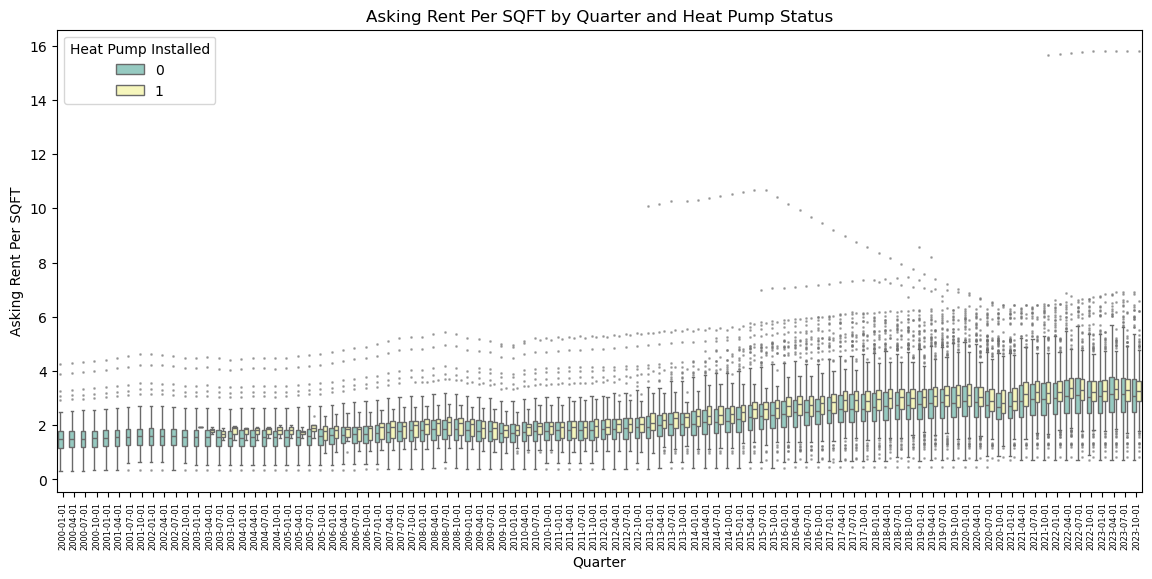

In [14]:
## make a box plot of the data_apt_time data, with 'Quarter_ts' as x axis(period[Q-DEC]) and 'AskingRentPerSF' as y axis, color by 'has heat pump', 
## make the x axis as time series with vertical lines for each year and the text orientation of the x axis labels as vertical

data_apt_time['Quarter_ts'] = pd.PeriodIndex(data_apt_time['Quarter_ts'], freq='Q-DEC').to_timestamp()

data_apt_time = data_apt_time.drop_duplicates(subset=['addr_clean', 'Quarter_ts'], keep='last')


data_apt_time = data_apt_time.sort_values('Quarter_ts')
plt.figure(figsize=(14, 6))
flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='gray', alpha=0.5)

sns.boxplot(data=data_apt_time, x='Quarter_ts', y='AskingRentPerSF', hue='HP_installed', palette='Set3', flierprops=flierprops
)
plt.title('Asking Rent Per SQFT by Quarter and Heat Pump Status')
plt.xlabel('Quarter')
plt.ylabel('Asking Rent Per SQFT')
plt.legend(title='Heat Pump Installed')
plt.xticks(rotation=90, fontsize = 6)
plt.show()



The above image suggest that the apartment with heat pump is in general mpore expensive than those without heat pump
- however, confounding variables could be:
    - those with the ability to install heat pump might have better financial conditions// were targeted for higher end?
    

<Axes: xlabel='Quarter_ts'>

Text(0.5, 1.0, 'Average Asking Rent Per SQFT Over Time by Heat Pump Status')

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Average Asking Rent Per SQFT')

(array([120, 140, 160, 180, 200]),
 [Text(120, 0, '2000'),
  Text(140, 0, '2005'),
  Text(160, 0, '2010'),
  Text(180, 0, '2015'),
  Text(200, 0, '2020')])

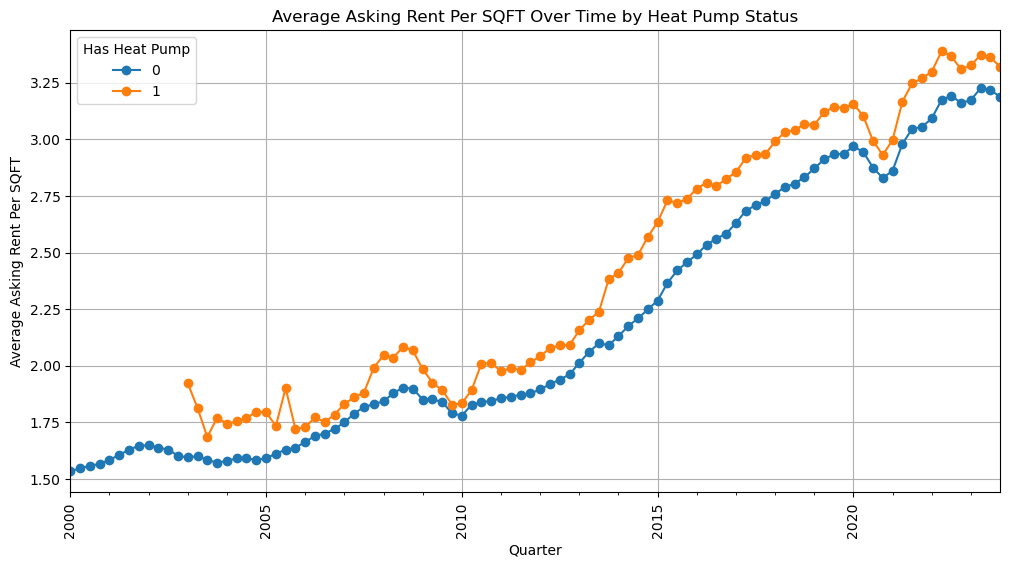

<Axes: xlabel='Quarter_ts'>

Text(0.5, 1.0, 'Median Asking Rent Per SQFT Over Time by Heat Pump Status')

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Median Asking Rent Per SQFT')

(array([120, 140, 160, 180, 200]),
 [Text(120, 0, '2000'),
  Text(140, 0, '2005'),
  Text(160, 0, '2010'),
  Text(180, 0, '2015'),
  Text(200, 0, '2020')])

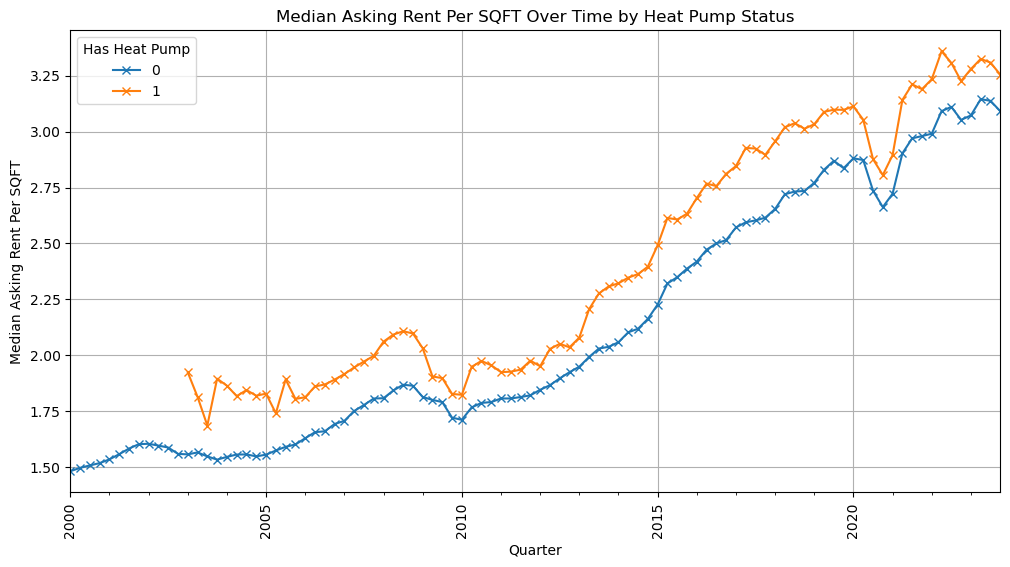

In [15]:
## Group the data by Quarter and has heat pump status, and calculate the mean value
df_grouped1 = data_apt_time.groupby(['Quarter_ts', 'HP_installed'])['AskingRentPerSF'].mean().unstack()
df_grouped2 = data_apt_time.groupby(['Quarter_ts', 'HP_installed'])['AskingRentPerSF'].median().unstack()

##Then use:
# - Paired t-test if same time points exist for both groups.
# - Repeated Measures ANOVA or Linear Mixed Models for more complex dependencies.
df_grouped1.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Asking Rent Per SQFT Over Time by Heat Pump Status')
plt.xlabel('Quarter')
plt.ylabel('Average Asking Rent Per SQFT')
plt.legend(title='Has Heat Pump')
plt.xticks(rotation=90)
plt.grid()
plt.show()

df_grouped2.plot(kind='line', marker='x', figsize=(12, 6))
plt.title('Median Asking Rent Per SQFT Over Time by Heat Pump Status')
plt.xlabel('Quarter')
plt.ylabel('Median Asking Rent Per SQFT')
plt.legend(title='Has Heat Pump')
plt.xticks(rotation=90)
plt.grid()
plt.show()


<Figure size 1300x600 with 0 Axes>

<Axes: xlabel='Quarter_ts', ylabel='EffectiveRentPerSF'>

Text(0.5, 1.0, 'Effective Rent Per SQFT by Quarter and Heat Pump Status')

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Asking Rent Per SQFT')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95],
 [Text(0, 0, '2000-01-01'),
  Text(1, 0, '2000-04-01'),
  Text(2, 0, '2000-07-01'),
  Text(3, 0, '2000-10-01'),
  Text(4, 0, '2001-01-01'),
  Text(5, 0, '2001-04-01'),
  Text(6, 0, '2001-07-01'),
  Text(7, 0, '2001-10-01'),
  Text(8, 0, '2002-01-01'),
  Text(9, 0, '2002-04-01'),
  Text(10, 0, '2002-07-01'),
  Text(11, 0, '2002-10-01'),
  Text(12, 0, '2003-01-01'),
  Text(13, 0, '2003-04-01'),
  Text(14, 0, '2003-07-01'),
  Text(1

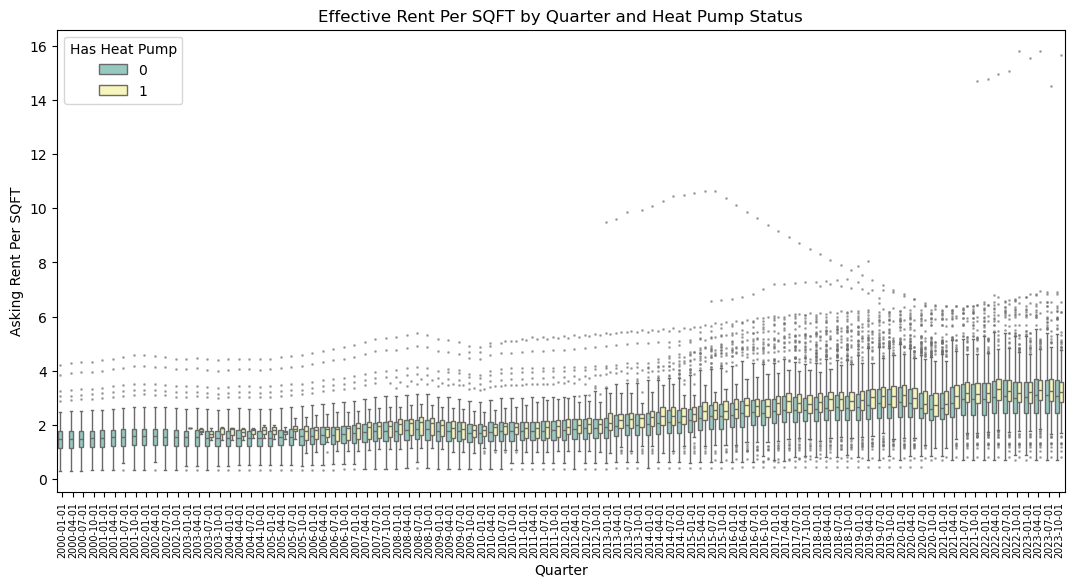

<Axes: xlabel='Quarter_ts'>

Text(0.5, 1.0, 'Average Effective Rent Per SQFT Over Time by Heat Pump Status')

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Average Effective Rent Per SQFT')

(array([120, 140, 160, 180, 200]),
 [Text(120, 0, '2000'),
  Text(140, 0, '2005'),
  Text(160, 0, '2010'),
  Text(180, 0, '2015'),
  Text(200, 0, '2020')])

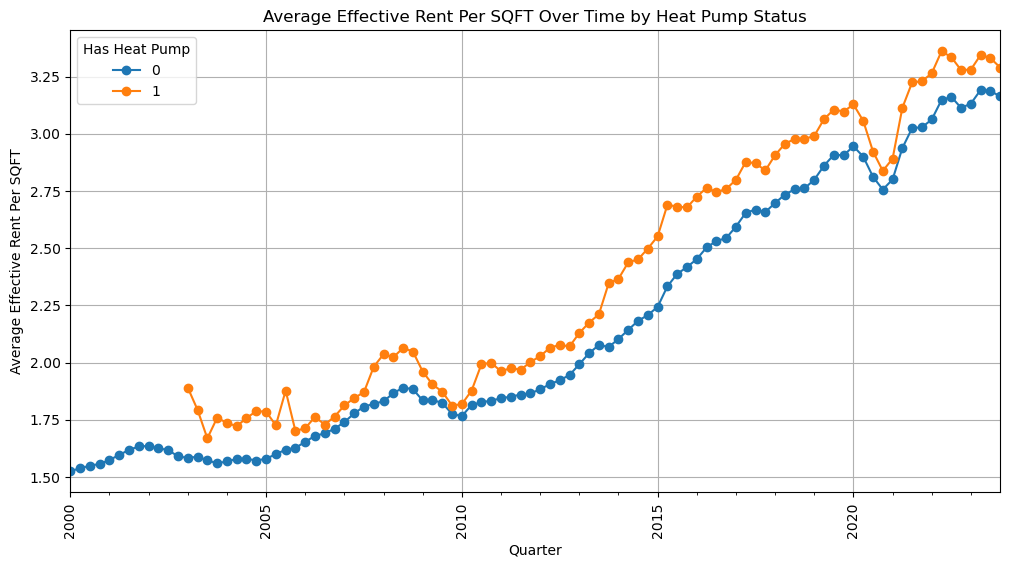

<Axes: xlabel='Quarter_ts'>

Text(0.5, 1.0, 'Median Effective Rent Per SQFT Over Time by Heat Pump Status')

Text(0.5, 0, 'Quarter')

Text(0, 0.5, 'Median Effective Rent Per SQFT')

(array([120, 140, 160, 180, 200]),
 [Text(120, 0, '2000'),
  Text(140, 0, '2005'),
  Text(160, 0, '2010'),
  Text(180, 0, '2015'),
  Text(200, 0, '2020')])

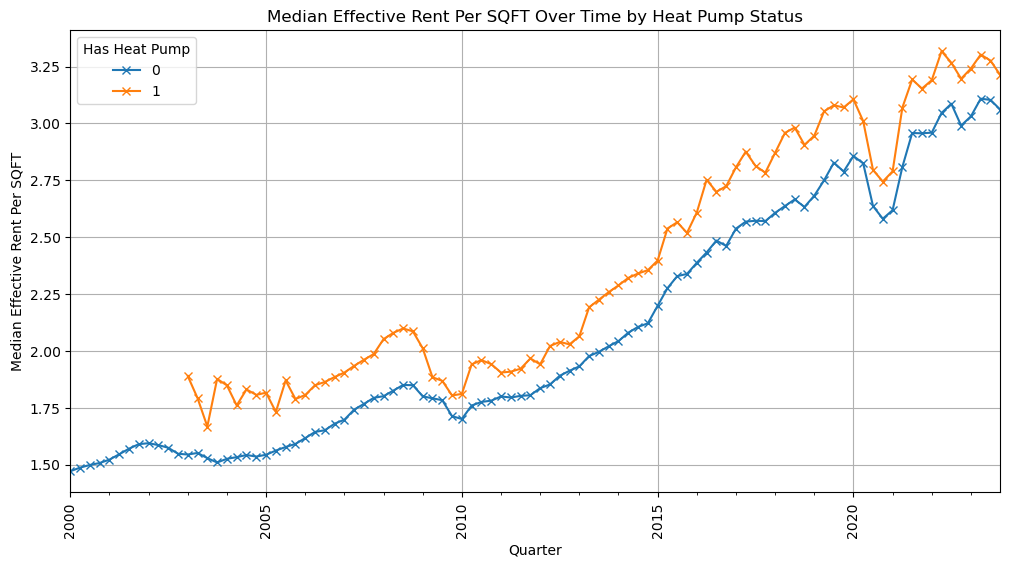

In [16]:
## make a box plot of the data_apt_time data, with 'Quarter_ts' as x axis(period[Q-DEC]) and 'EffectiveRentPerSF' as y axis, color by 'has heat pump', 
## make the x axis as time series with vertical lines for each year and the text orientation of the x axis labels as vertical
plt.figure(figsize=(13, 6))
flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='gray', alpha=0.5)
sns.boxplot(data=data_apt_time, x='Quarter_ts', y='EffectiveRentPerSF', hue='HP_installed', palette='Set3', flierprops=flierprops
)
plt.title('Effective Rent Per SQFT by Quarter and Heat Pump Status')
plt.xlabel('Quarter')
plt.ylabel('Asking Rent Per SQFT')
plt.legend(title='Has Heat Pump')
plt.xticks(rotation=90, fontsize = 7)
plt.show()

## Group the data by Quarter and has heat pump status, and calculate the mean value of EffectiveRentPerSF
df_grouped1 = data_apt_time.groupby(['Quarter_ts', 'HP_installed'])['EffectiveRentPerSF'].mean().unstack()
df_grouped2 = data_apt_time.groupby(['Quarter_ts', 'HP_installed'])['EffectiveRentPerSF'].median().unstack()

##Then use:
# - Paired t-test if same time points exist for both groups.
# - Repeated Measures ANOVA or Linear Mixed Models for more complex dependencies.
df_grouped1.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Effective Rent Per SQFT Over Time by Heat Pump Status')
plt.xlabel('Quarter')
plt.ylabel('Average Effective Rent Per SQFT')
plt.legend(title='Has Heat Pump')
plt.xticks(rotation=90)
plt.grid()
plt.show()

df_grouped2.plot(kind='line', marker='x', figsize=(12, 6))
plt.title('Median Effective Rent Per SQFT Over Time by Heat Pump Status')
plt.xlabel('Quarter')
plt.ylabel('Median Effective Rent Per SQFT')
plt.legend(title='Has Heat Pump')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_rent_by_heat_pump_status(data, time_col='Quarter1', rent_col='EffectiveRentPerSF', hp_col='HP_covered_residential_units', figsize=(13, 6)):
    """
    Visualizes rent trends over time by heat pump status using box plots and line plots.
    
    Parameters:
    - data: pandas DataFrame containing rent and heat pump data
    - time_col: column representing time periods (e.g., 'Quarter_ts')
    - rent_col: column representing rent per square foot
    - hp_col: column indicating heat pump presence (binary or categorical)
    """
    
    # --- Box Plot ---
    plt.figure(figsize= figsize)
    flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='gray', alpha=0.5)
    sns.boxplot(data=data, x=time_col, y=rent_col, hue=hp_col, palette='Set3', flierprops=flierprops)
    plt.title('Effective Rent Per SQFT by Quarter and Heat Pump Status')
    plt.xlabel('Quarter')
    plt.ylabel('Asking Rent Per SQFT')
    plt.legend(title='Has Heat Pump')
    plt.xticks(rotation=90, fontsize=7)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Grouped Mean ---
    df_mean = data.groupby([time_col, hp_col])[rent_col].mean().unstack()
    df_mean.plot(kind='line', marker='o', figsize= figsize)
    plt.title('Average Effective Rent Per SQFT Over Time by Heat Pump Status')
    plt.xlabel('Quarter')
    plt.ylabel('Average Effective Rent Per SQFT')
    plt.legend(title='Has Heat Pump in Units')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # --- Grouped Median ---
    df_median = data.groupby([time_col, hp_col])[rent_col].median().unstack()
    df_median.plot(kind='line', marker='x', figsize= figsize)
    plt.title('Median Effective Rent Per SQFT Over Time by Heat Pump Status')
    plt.xlabel('Quarter')
    plt.ylabel('Median Effective Rent Per SQFT')
    plt.legend(title='Has Heat Pump in Units')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()
    plt.show()

### do the same for the units installed HP

In [18]:
data_apt_time['coverage_filled1'] = np.where(data_apt_time['HP_related'] == 0,  "No Heat Pump Installed", data_apt_time['coverage_filled'])

In [19]:
data_apt_time['coverage_filled1'].value_counts()
data_apt_time['coverage_filled'].value_counts()

## check each address how many types of coverage_filled and arrange by descending order
data_apt_time.groupby('addr_clean')['coverage_filled1'].nunique().value_counts().sort_index(ascending=False)

coverage_filled1
No Heat Pump Installed    37742
Common Areas Only          4345
Partial Coverage           2881
Uncertain                  2651
Whole Building              236
Name: count, dtype: int64

coverage_filled
No Heat Pump Installed    37312
Common Areas Only          4496
Partial Coverage           3158
Uncertain                  2652
Whole Building              237
Name: count, dtype: int64

coverage_filled1
4      7
3     32
2    180
1    724
Name: count, dtype: int64

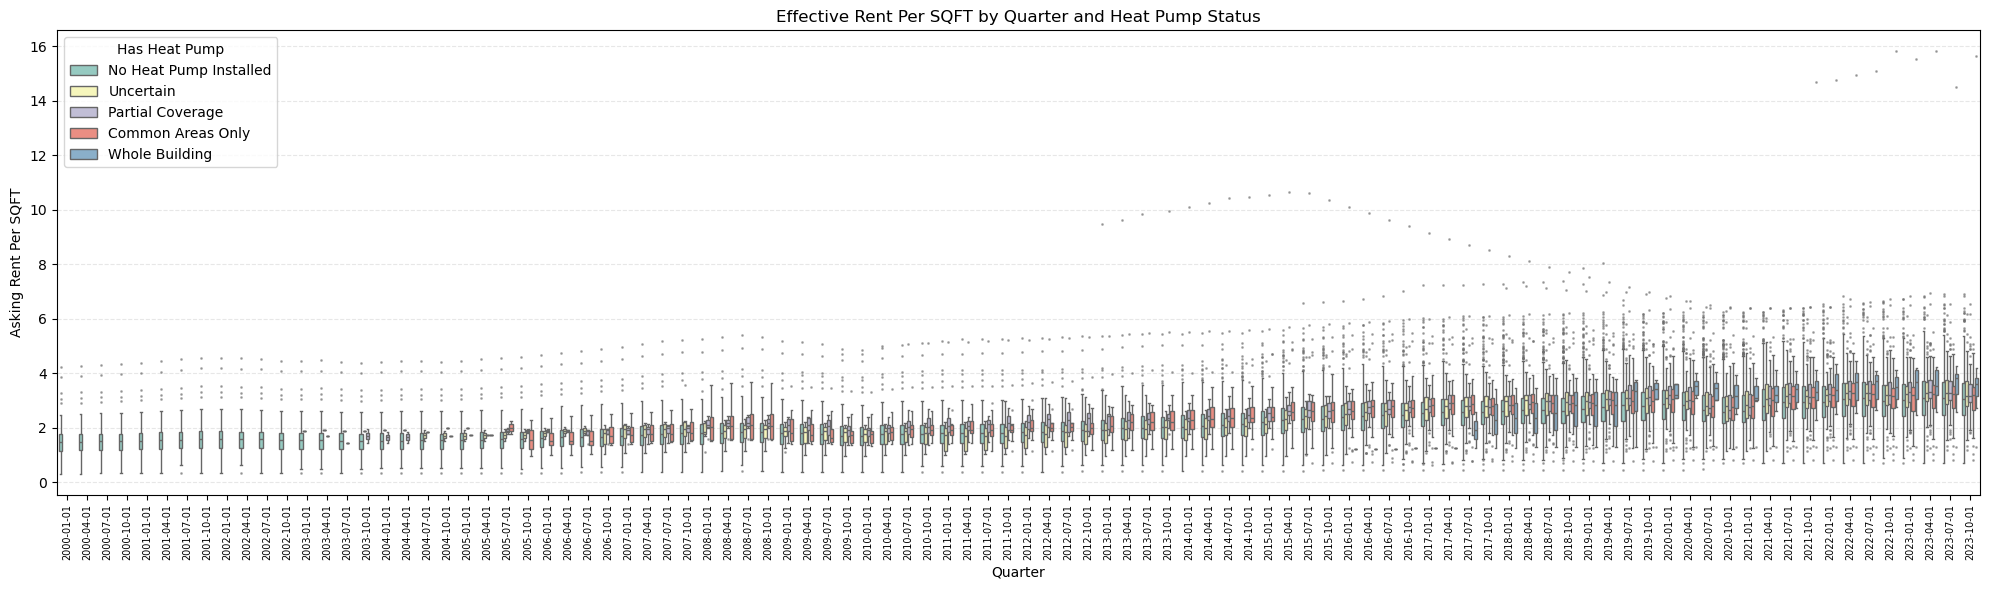

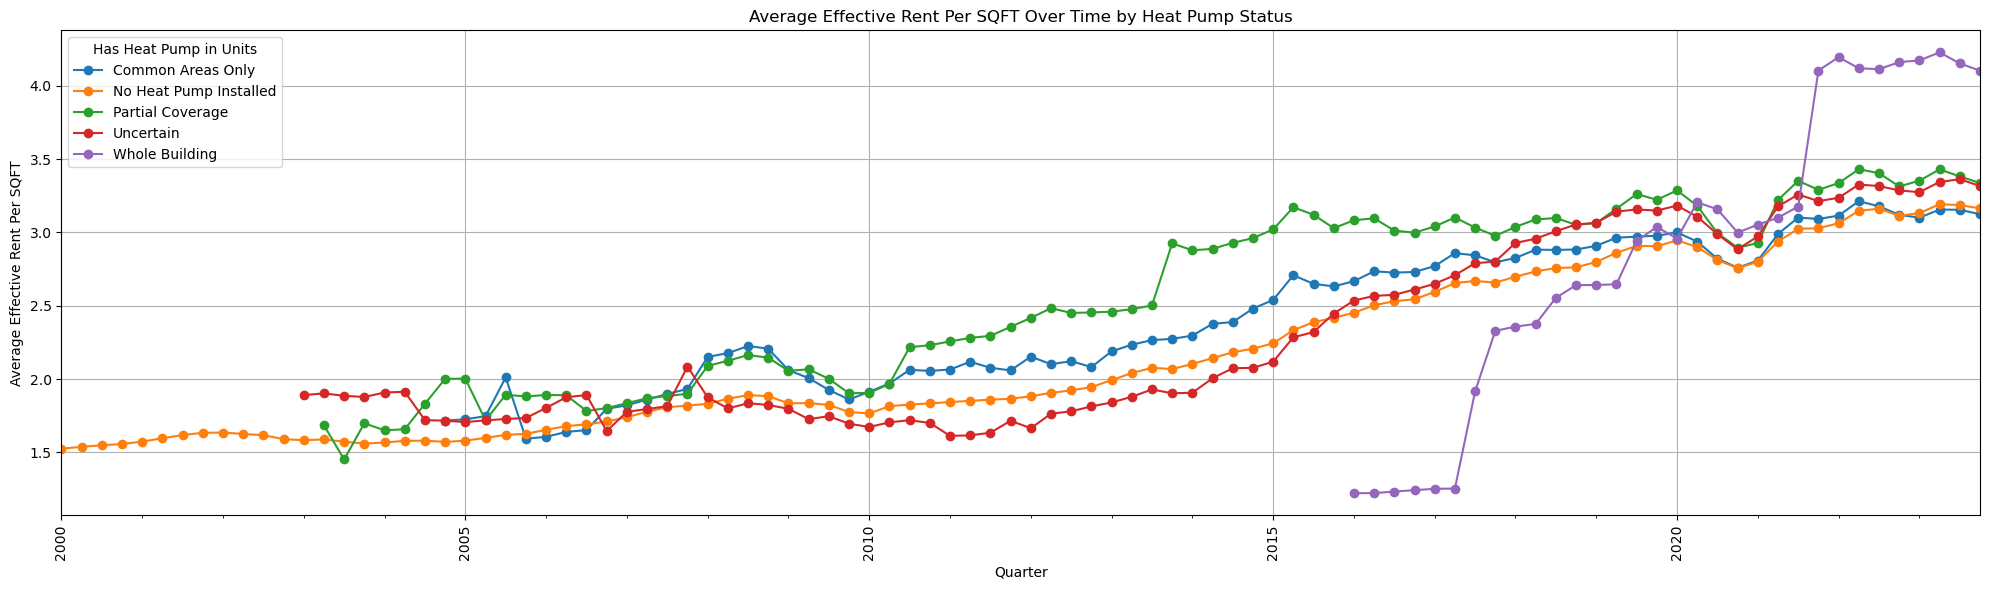

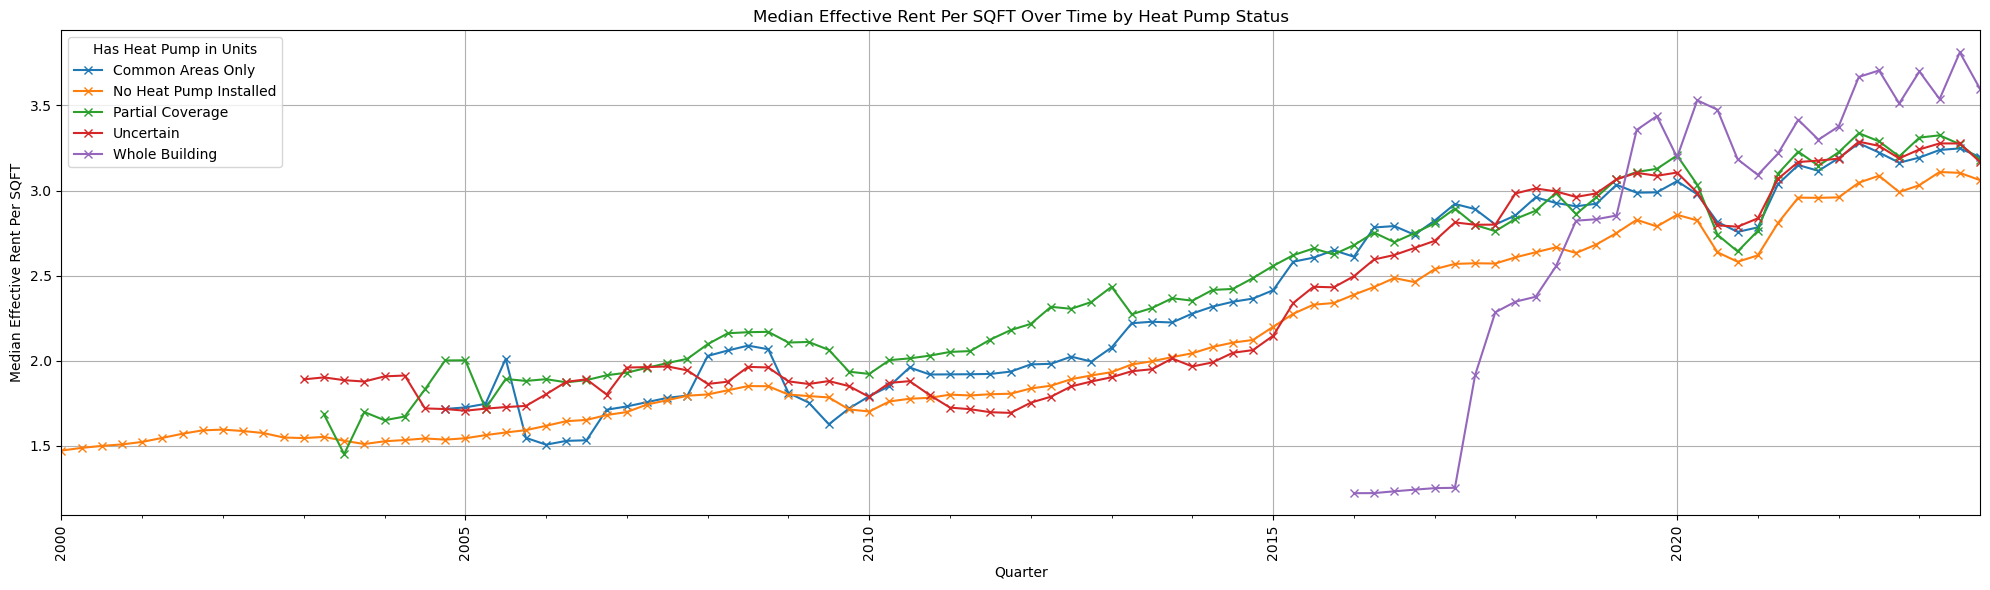

In [20]:
plot_rent_by_heat_pump_status(data_apt_time,time_col='Quarter_ts', hp_col='coverage_filled1',figsize= (20,6))

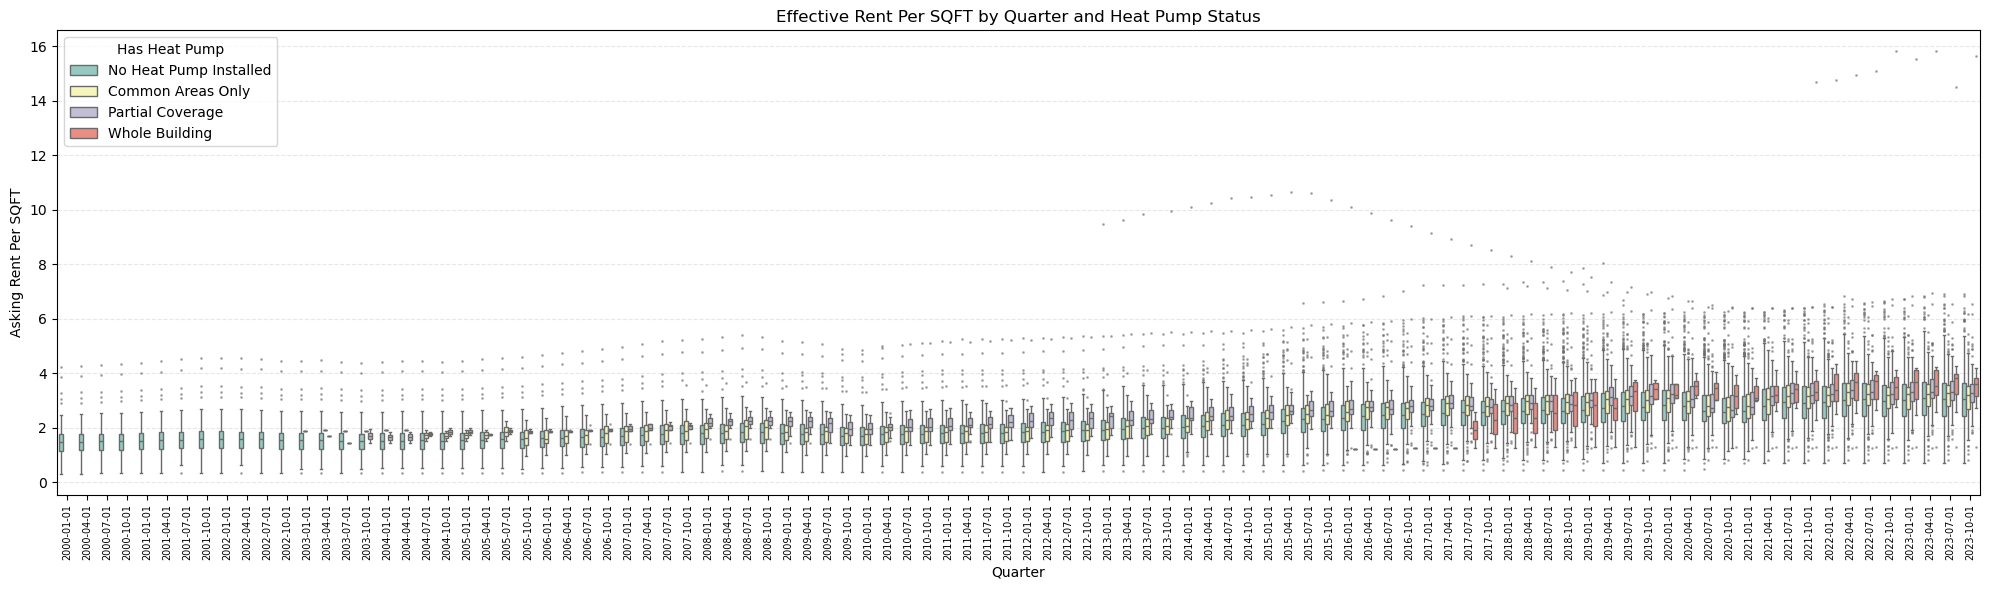

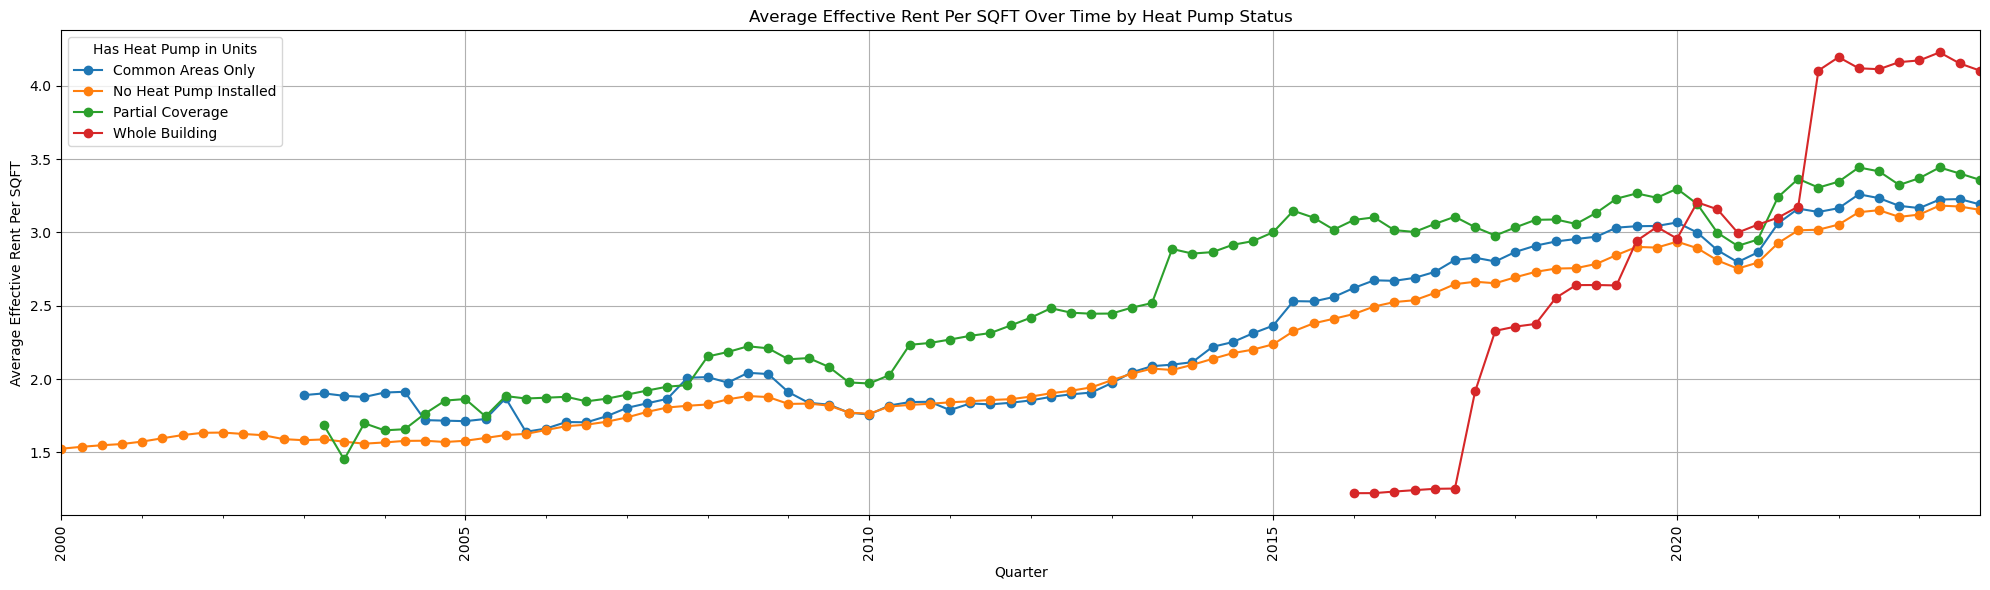

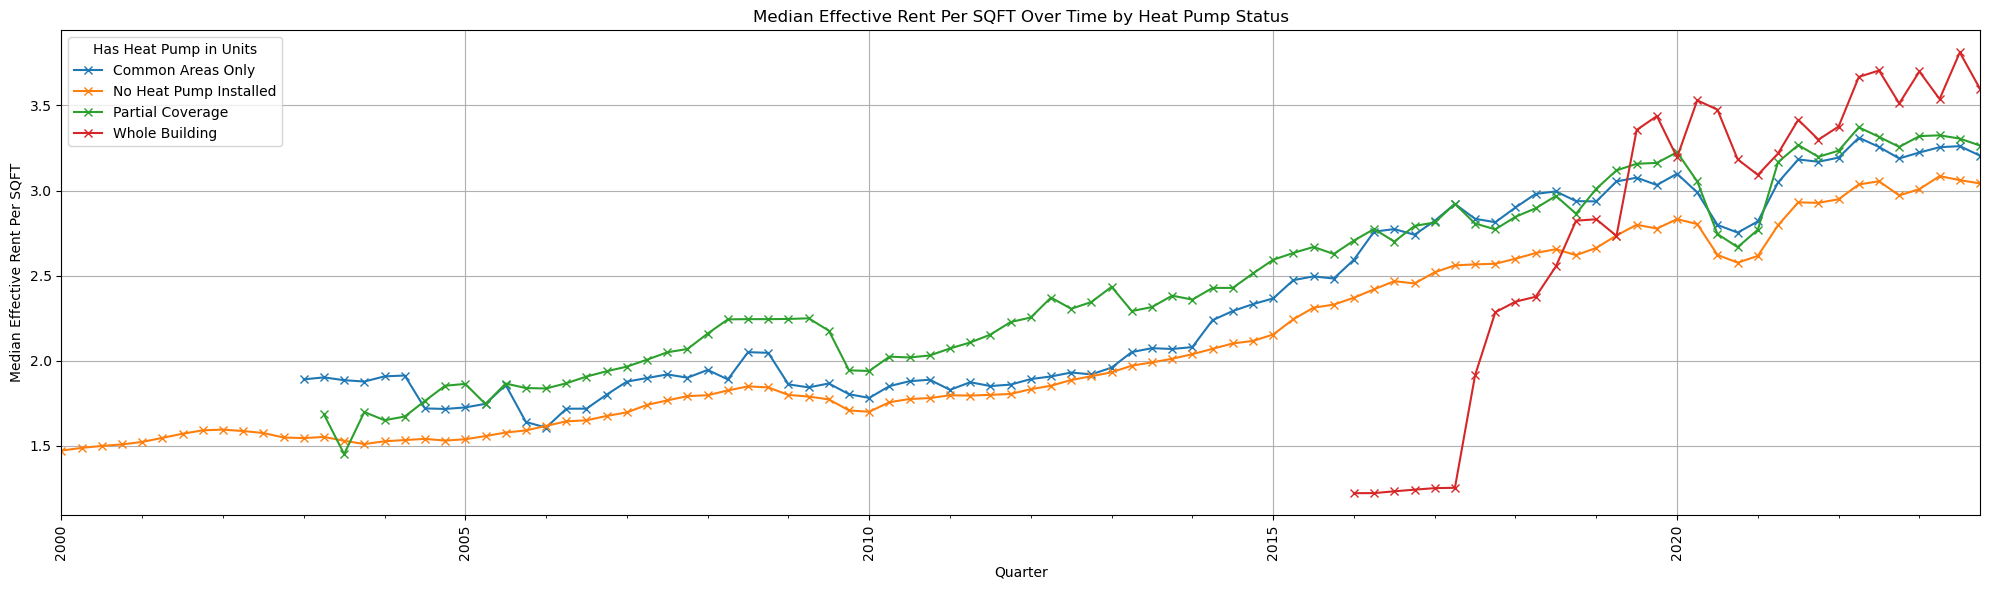

In [21]:
## now check for coverage_filled2
plot_rent_by_heat_pump_status(data_apt_time,time_col='Quarter_ts', hp_col='coverage_filled2',figsize= (20,6))

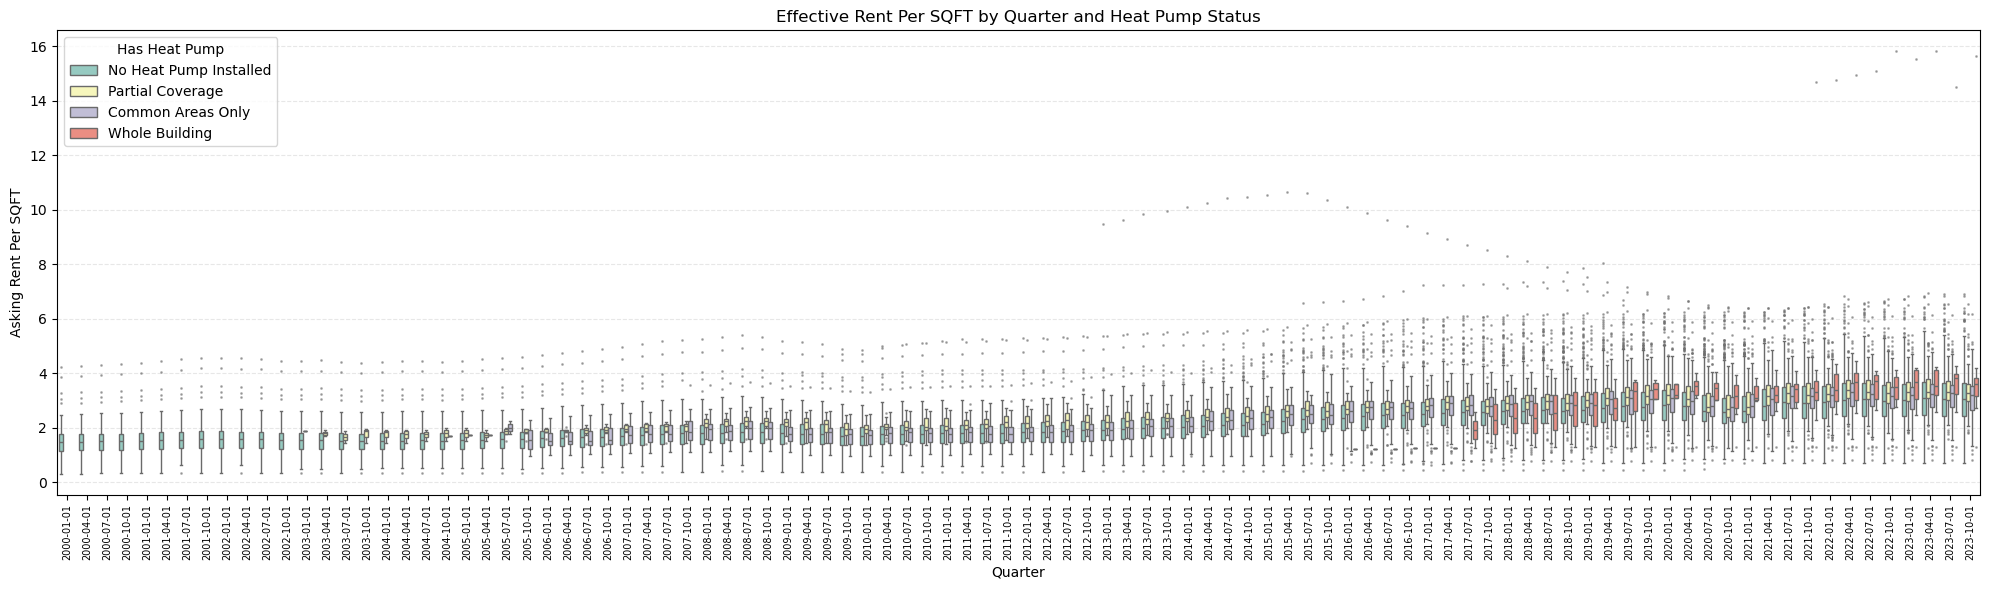

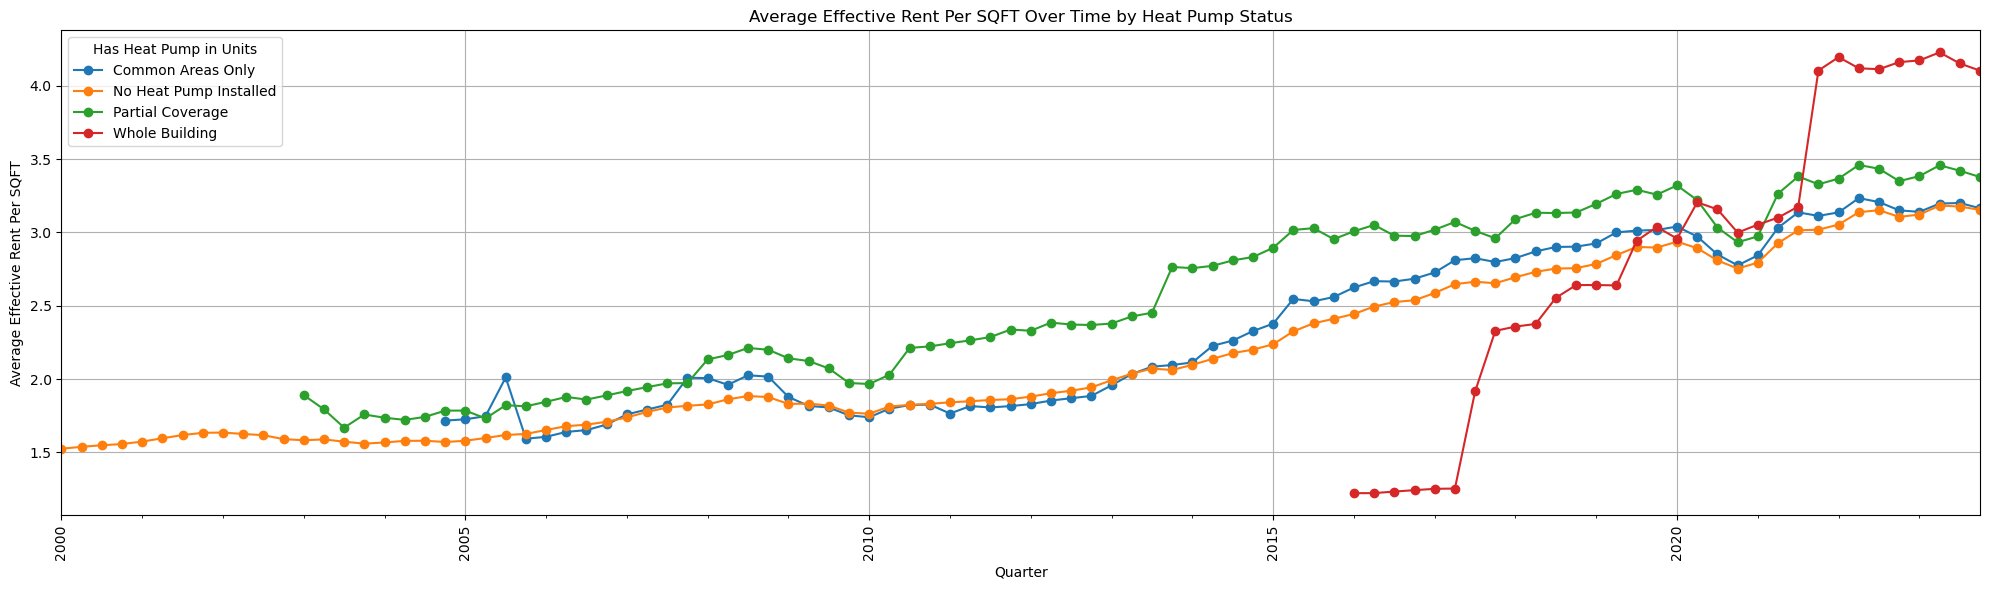

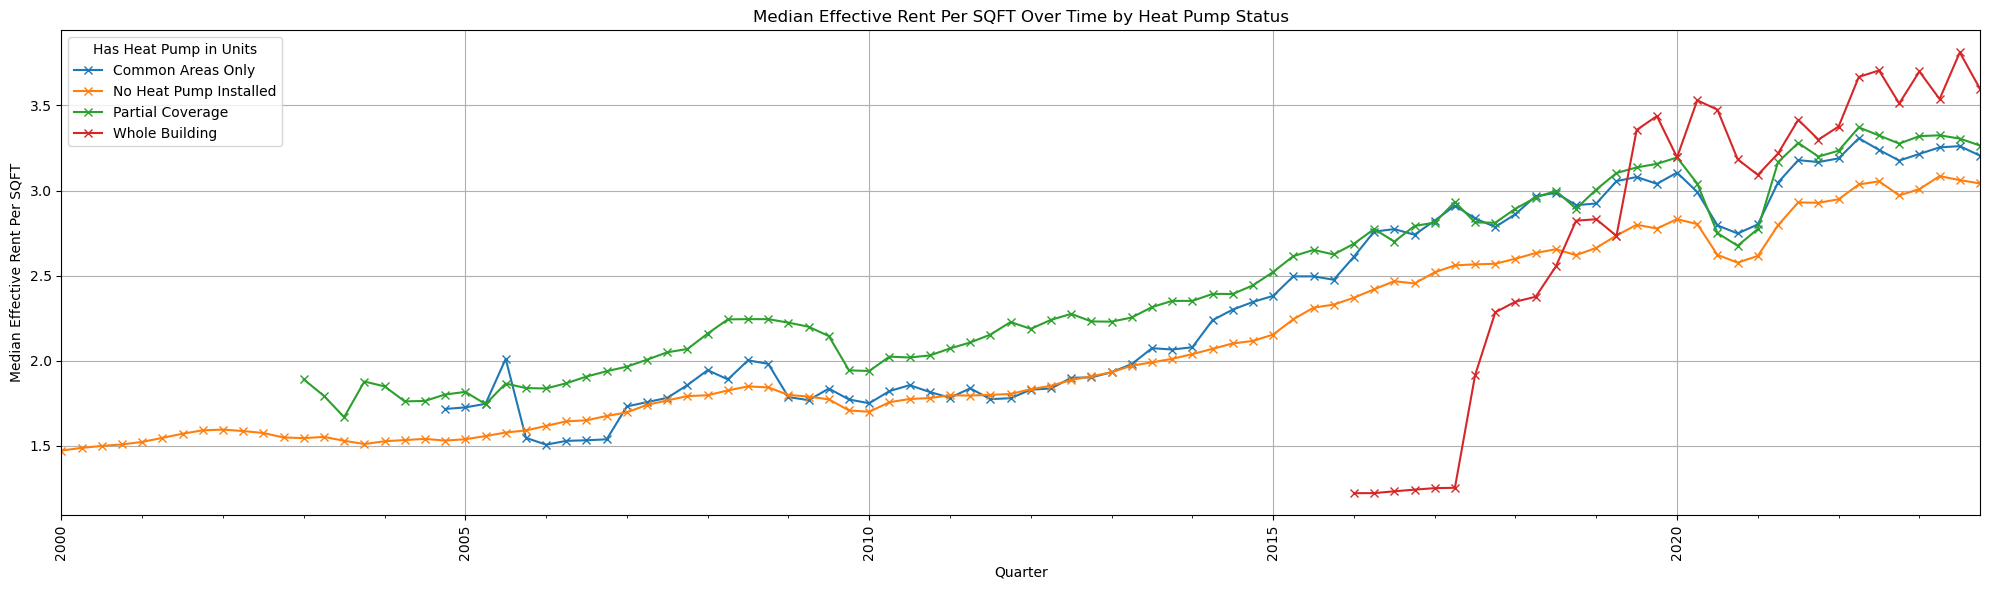

In [22]:
plot_rent_by_heat_pump_status(data_apt_time,time_col='Quarter_ts', hp_col='predicted_label',figsize= (20,6))

predicted_label  Common Areas Only  No Heat Pump Installed  Partial Coverage  \
Quarter_ts                                                                     
2000-01-01                       0                     250                 0   
2000-04-01                       0                     253                 0   
2000-07-01                       0                     257                 0   
2000-10-01                       0                     259                 0   
2001-01-01                       0                     259                 0   
...                            ...                     ...               ...   
2022-10-01                     180                     580               135   
2023-01-01                     184                     585               136   
2023-04-01                     187                     588               137   
2023-07-01                     191                     591               138   
2023-10-01                     195      

<Axes: xlabel='Quarter_ts'>

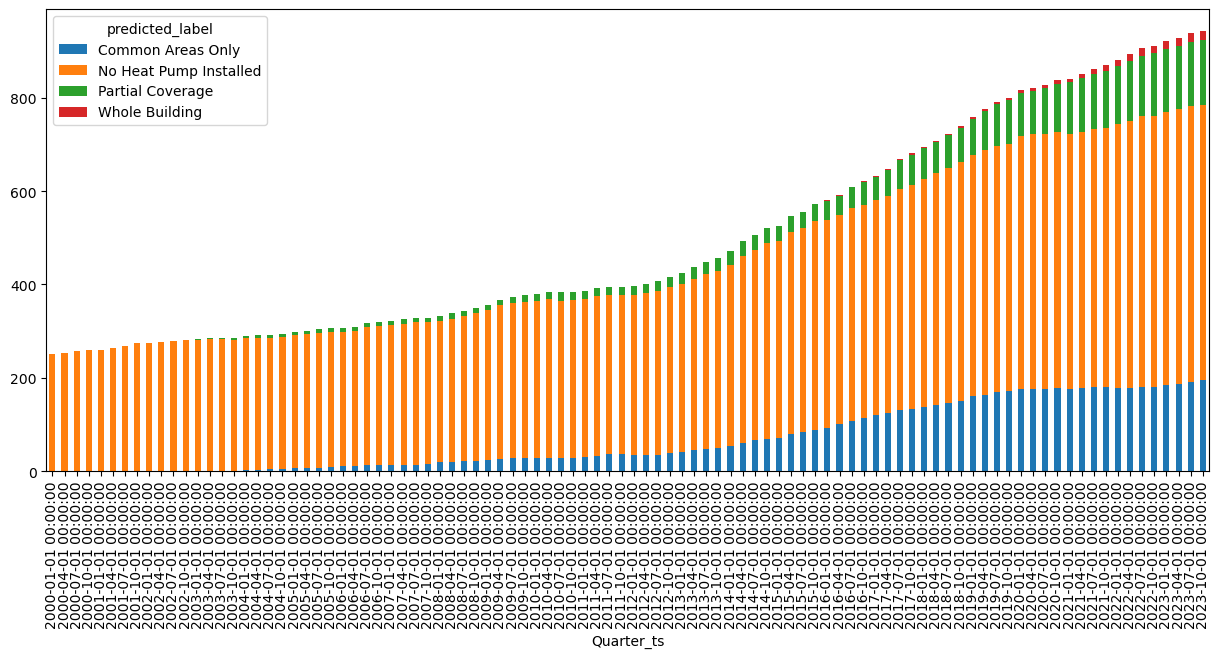

In [23]:


##drop duplicated addr_clean and Quarter1 for data_apt_time

## check how many data points in each coverage_filled1 per quarter and plot it
coverage_counts = data_apt_time.groupby(['Quarter_ts', 'predicted_label']).size().unstack(fill_value=0)
print(coverage_counts)

coverage_counts.plot(kind='bar', stacked=True, figsize=(15, 6))

In [24]:
## find which addresses has 'Whole Building' in '2023-07-01' but not in '2023-10-01'

whole_building_20230701 = data_apt_time[data_apt_time['Quarter_ts'] == '2023-07-01'][data_apt_time['coverage_filled1'] == 'Whole Building']['addr_clean']
whole_building_20231001 = data_apt_time[data_apt_time['Quarter_ts'] == '2023-10-01'][data_apt_time['coverage_filled1'] == 'Whole Building']['addr_clean']

## find addresses in whole_building_20230701 but not in whole_building_20231001
set(whole_building_20230701).__len__()
set(whole_building_20231001).__len__()

whole_building_20230701.value_counts()
whole_building_20231001.value_counts()

C:\Users\nings\AppData\Local\Temp\ipykernel_29788\1655788622.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  whole_building_20230701 = data_apt_time[data_apt_time['Quarter_ts'] == '2023-07-01'][data_apt_time['coverage_filled1'] == 'Whole Building']['addr_clean']
C:\Users\nings\AppData\Local\Temp\ipykernel_29788\1655788622.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  whole_building_20231001 = data_apt_time[data_apt_time['Quarter_ts'] == '2023-10-01'][data_apt_time['coverage_filled1'] == 'Whole Building']['addr_clean']


19

19

addr_clean
4722 FAUNTLEROY WAY SW    1
417 2ND AVE W             1
4906 25TH AVE NE          1
106 N 36TH ST             1
1029 S JACKSON ST         1
3939 S OTHELLO ST         1
4020 NE 55TH ST           1
118 BROADWAY E            1
1300 E PIKE ST            1
2201 EASTLAKE AVE E       1
1255 HARRISON ST          1
7009 GREENWOOD AVE N      1
701 16TH AVE              1
1401 E MADISON ST         1
1701 N 45TH ST            1
1405 DEXTER AVE N         1
133 PONTIUS AVE N         1
1320 UNIVERSITY ST        1
815 NE 66TH ST            1
Name: count, dtype: int64

addr_clean
1701 N 45TH ST            1
133 PONTIUS AVE N         1
1320 UNIVERSITY ST        1
417 2ND AVE W             1
1405 DEXTER AVE N         1
1401 E MADISON ST         1
7009 GREENWOOD AVE N      1
701 16TH AVE              1
4020 NE 55TH ST           1
1255 HARRISON ST          1
3939 S OTHELLO ST         1
1300 E PIKE ST            1
118 BROADWAY E            1
2201 EASTLAKE AVE E       1
4906 25TH AVE NE          1
1029 S JACKSON ST         1
815 NE 66TH ST            1
106 N 36TH ST             1
4722 FAUNTLEROY WAY SW    1
Name: count, dtype: int64

In [25]:
## find the counts on coverage_counts on '2016-01-01'
coverage_counts.loc['2015-10-01']
coverage_counts.loc['2016-01-01']
coverage_counts.loc['2017-07-01']
coverage_counts.loc['2018-01-01']
coverage_counts.loc['2023-07-01']
coverage_counts.loc['2023-10-01']


## find out which building was 'Whole Building ' on '2015-10-01' but not 'Whole Building' on '2016-01-01'
buildings_changed = data_apt_time[
    (data_apt_time['Quarter_ts'] == pd.Timestamp('2015-10-01')) &
    (data_apt_time['coverage_filled1'] == 'Whole Building')
]['addr_clean'].unique()
buildings_changed 

data_apt_time[
    (data_apt_time['addr_clean'].isin(buildings_changed))]

predicted_label
Common Areas Only          89
No Heat Pump Installed    447
Partial Coverage           36
Whole Building              0
Name: 2015-10-01 00:00:00, dtype: int64

predicted_label
Common Areas Only          92
No Heat Pump Installed    447
Partial Coverage           40
Whole Building              1
Name: 2016-01-01 00:00:00, dtype: int64

predicted_label
Common Areas Only         132
No Heat Pump Installed    473
Partial Coverage           62
Whole Building              2
Name: 2017-07-01 00:00:00, dtype: int64

predicted_label
Common Areas Only         137
No Heat Pump Installed    489
Partial Coverage           66
Whole Building              3
Name: 2018-01-01 00:00:00, dtype: int64

predicted_label
Common Areas Only         191
No Heat Pump Installed    591
Partial Coverage          138
Whole Building             19
Name: 2023-07-01 00:00:00, dtype: int64

predicted_label
Common Areas Only         195
No Heat Pump Installed    590
Partial Coverage          139
Whole Building             19
Name: 2023-10-01 00:00:00, dtype: int64

array([], dtype=object)

Empty DataFrame
Columns: [Number_x, Quarter, Status, AskingRentPerUnit, AskingRentPerSF, AskingRentGrowthYr, EffectiveRentPerUnit, EffectiveRentPerSF, EffectiveRentGrowthYr, VacancyUnits, VacancyTotal, Address_x, BuildingName_x, StarRating_x, ES, Esyearscertified, Eslast, LEED_x, GreenRating_x, LEEDtype, Points, version, RBAGLA, Submarket_x, City_x, ZIPCode_x, Stories_x, YearBuilt_x, YearRenov_x, Class_x, TrueOwner_x, Units_x, Style_x, AvgConcessions, StudiosUnits, Onebedunits, Twobedunits, Threebedunits, Fourbedunits, RentType, AffordableType, ParkingSpacesUnit, ParkingSpaces_x, MarketSegment, latitude_x, longitude_x, Neighborhood_x, addr_clean, has heat pump, Quarter_clean, Quarter_period, Quarter_end, Permit Number, Permit_Content, addr_clean_x, BuildingName_y, StarRating_y, Submarket_y, City_y, ZIPCode_y, Stories_y, YearBuilt_y, YearRenov_y, Class_y, TrueOwner_y, Units_y, latitude_y, longitude_y, Neighborhood_y, LEED_y, GreenRating_y, ParkingSpaces_y, Style_y, Permit Class, Permit Class Mapped, Perm, Permit Type Mapped, Description, Appliance Type, Est Project Cost, Contractor Name, Applied Date, Issued Date, Expires Date, Month Applied For, Year Completed, Current Status, PIN, Address_y, Property Name, Detailed Existing Land Use, Planning Existing Land Use Code, General Existing Land Use, Ownership Type, Number of Buildings, Number of Floors, 20K, Existing Building Square Feet, Number of Units, Year Built Group, ...]
Index: []

[0 rows x 167 columns]

In [26]:
## check for those with 'coverage_filled1' as 'No Heat Pump Installed' but 'coverage_filled' not as 'No Heat Pump Installed'
mask = (data_apt_time['coverage_filled1'] == 'No Heat Pump Installed') & (data_apt_time['coverage_filled'] != 'No Heat Pump Installed')
filtered_data = data_apt_time[mask]
filtered_data.to_csv('./02ProcessedData/filtered_hp_coverage_mismatch_1031.csv', index=False)

In [27]:
## map out the location of the apartments with and without heat pump on the map of Seattle
import geopandas as gpd
import geodatasets as gd
## get the open street map of Seattle

import folium

# Create a map centered at a location
m = folium.Map(location=[47.6062, -122.3321], zoom_start=12, tiles='OpenStreetMap')

## if latitude and longitude are not existing, make them from latitude_x and longitude_x
if 'latitude' not in data_apt_time.columns or data_apt_time['latitude'].isnull().all():
    data_apt_time['latitude'] = data_apt_time['latitude_x']
    data_apt_time['longitude'] = data_apt_time['longitude_x']

## find out unique locations of apartments with and without heat pump
df_has_hp = data_apt_time[data_apt_time['HP_installed'] == 1][['latitude', 'longitude','addr_clean','Completed Date','coverage_filled1']].sort_values('Completed Date').drop_duplicates(keep='last')
df_no_hp = data_apt_time[data_apt_time['HP_installed'] == 0][['latitude', 'longitude','addr_clean','Completed Date','coverage_filled1']].sort_values('Completed Date').drop_duplicates(keep='last')

df_has_hp

latitude  longitude            addr_clean Completed Date  \
37641  47.691157 -122.35173         522 N 85TH ST     2003-02-04   
20543  47.614648 -122.34314          2201 4TH AVE     2003-04-07   
39687  47.624538 -122.32954    601 EASTLAKE AVE E     2003-07-11   
28059  47.611780 -122.28989      3310 E SPRING ST     2003-09-05   
18057  47.614645 -122.33726     1942 WESTLAKE AVE     2003-10-09   
...          ...        ...                   ...            ...   
34667  47.561839 -122.37707      4600 36TH AVE SW            NaT   
34676  47.662701 -122.29408  4600 UNION BAY PL NE            NaT   
34691  47.662697 -122.29474  4609 UNION BAY PL NE            NaT   
5802   47.619271 -122.31286        121 15TH AVE E            NaT   
39640  47.624943 -122.36557     600 ELLIOTT AVE W            NaT   

        coverage_filled1  
37641          Uncertain  
20543   Partial Coverage  
39687          Uncertain  
28059  Common Areas Only  
18057   Partial Coverage  
...                  ...  
34667          Uncertain  
34676   Partial Coverage  
34691   Partial Coverage  
5802    Partial Coverage  
39640          Uncertain  

[906 rows x 5 columns]

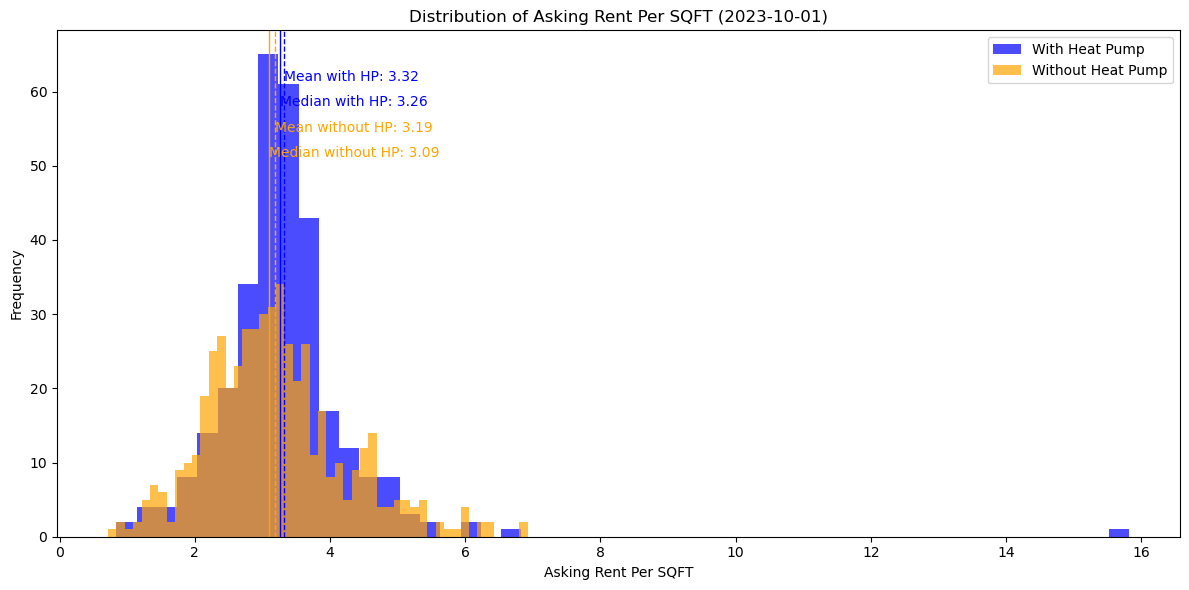

In [28]:
import matplotlib.pyplot as plt

def plot_rent_distribution_by_quarter(data = data_apt_time, rent = 'AskingRentPerSF', quarter_ts = '2023-10-01'):
    """
    Plots the distribution of Asking Rent Per SF for apartments with and without heat pumps,
    filtered by a specific Quarter_ts value.

    Parameters:
    - data: pandas DataFrame containing apartment data
    - quarter_ts: time reference (e.g., '2023Q4') to filter the data
    """
    # Filter data by Quarter_ts
    filtered_data = data[data['Quarter_ts'] == quarter_ts]

    # Create histogram
    plt.figure(figsize=(12, 6))
    plt.hist(filtered_data[filtered_data['HP_installed'] == 1][rent],
             bins=50, alpha=0.7, label='With Heat Pump', color='blue')
    plt.hist(filtered_data[filtered_data['HP_installed'] == 0][rent],
             bins=50, alpha=0.7, label='Without Heat Pump', color='orange')
    ## add vertical lines for mean and median
    mean_with_hp = filtered_data[filtered_data['HP_installed'] == 1][rent].mean()
    median_with_hp = filtered_data[filtered_data['HP_installed'] == 1][rent].median()
    mean_without_hp = filtered_data[filtered_data['HP_installed'] == 0][rent].mean()
    median_without_hp = filtered_data[filtered_data['HP_installed'] == 0][rent].median()
    plt.axvline(mean_with_hp, color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(median_with_hp, color='blue', linestyle='solid', linewidth=1)
    plt.axvline(mean_without_hp, color='orange', linestyle='dashed', linewidth=1)
    plt.axvline(median_without_hp, color='orange', linestyle='solid', linewidth=1)
    plt.title(f'Distribution of Asking Rent Per SQFT ({quarter_ts})')
    plt.xlabel('Asking Rent Per SQFT')
    plt.ylabel('Frequency')
    plt.legend()
    ## add text for mean and median
    plt.text(mean_with_hp, plt.ylim()[1]*0.9, f'Mean with HP: {mean_with_hp:.2f}', color='blue')
    plt.text(median_with_hp, plt.ylim()[1]*0.85, f'Median with HP: {median_with_hp:.2f}', color='blue')
    plt.text(mean_without_hp, plt.ylim()[1]*0.8, f'Mean without HP: {mean_without_hp:.2f}', color='orange')
    plt.text(median_without_hp, plt.ylim()[1]*0.75, f'Median without HP: {median_without_hp:.2f}', color='orange')
    plt.tight_layout()
    plt.show()

plot_rent_distribution_by_quarter(data_apt_time)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_rent_trends(data, y_var, estimator='mean'):
    """
    Plot rent trends (mean or median) over time by building class and heat pump status.

    Parameters
    ----------
    data : pd.DataFrame
        Input dataframe containing 'Class_x', 'HP_installed', and 'Quarter_ts'.
    y_var : str
        The column name to plot (e.g., 'AskingRentPerSF', 'EffectiveRentPerSF').
    estimator : str or callable, default='mean'
        The aggregation function for y ('mean' or 'median').
    ci : int or None or 'sd', default=95
        Size of confidence interval or 'sd' for standard deviation.
    """

    # Create combined category
    data = data.copy()
    data['Class_HP'] = 'Class ' + data['Class_x'] + '_HP_' + data['HP_installed'].astype(str)

    # Set up figure
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=data,
        x='Quarter_ts',
        y=y_var,
        hue='Class_HP',
        marker='o',
        estimator=estimator,
        errorbar=('sd')
    )

    # Title and labels
    est_name = estimator.capitalize() if isinstance(estimator, str) else 'Value'
    plt.title(f'{est_name} {y_var.replace("_", " ")} Over Time by Building Class and Heat Pump Status')
    plt.xlabel('Quarter')
    plt.ylabel(y_var.replace("_", " "))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()




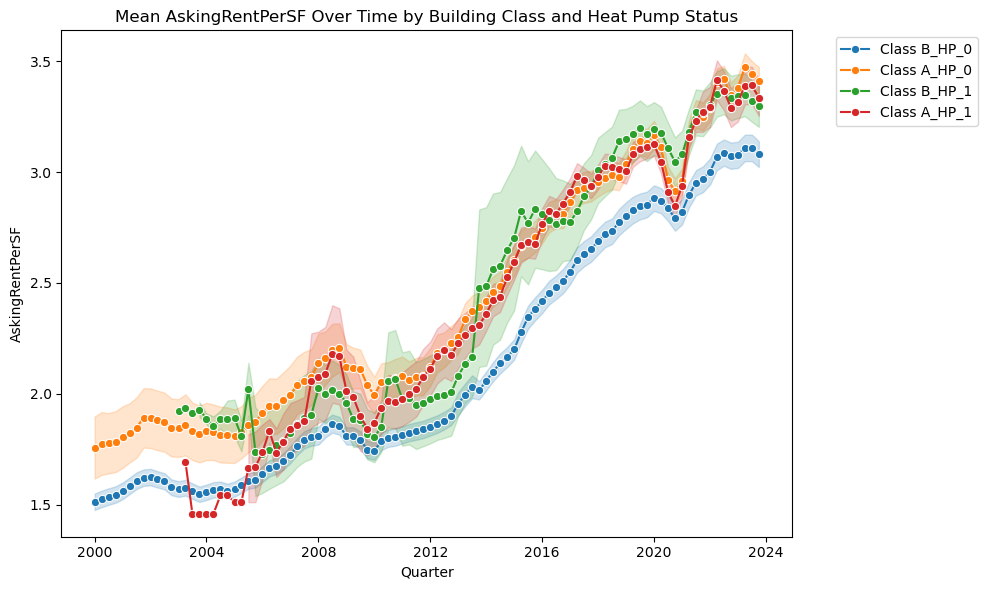

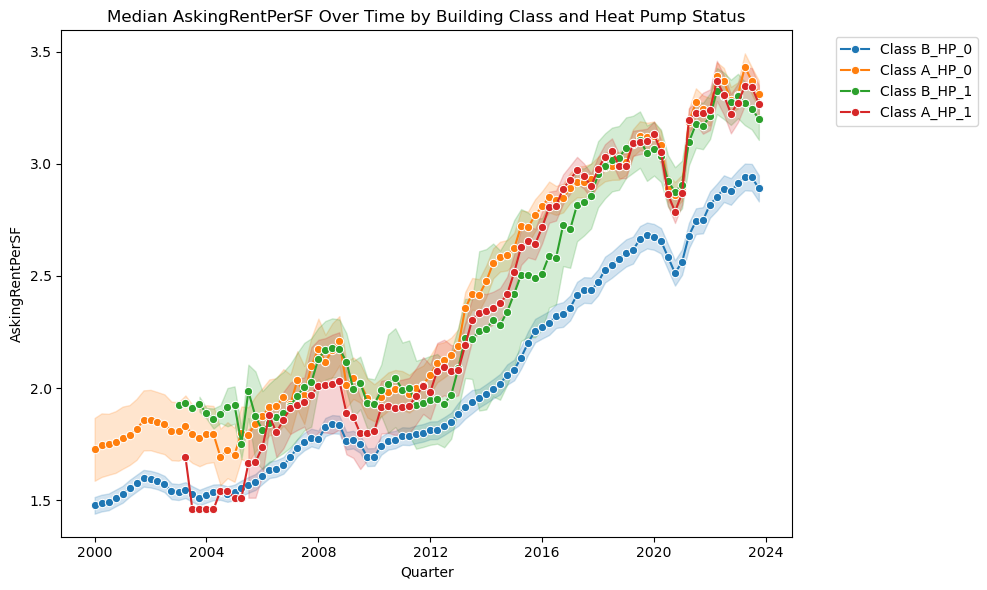

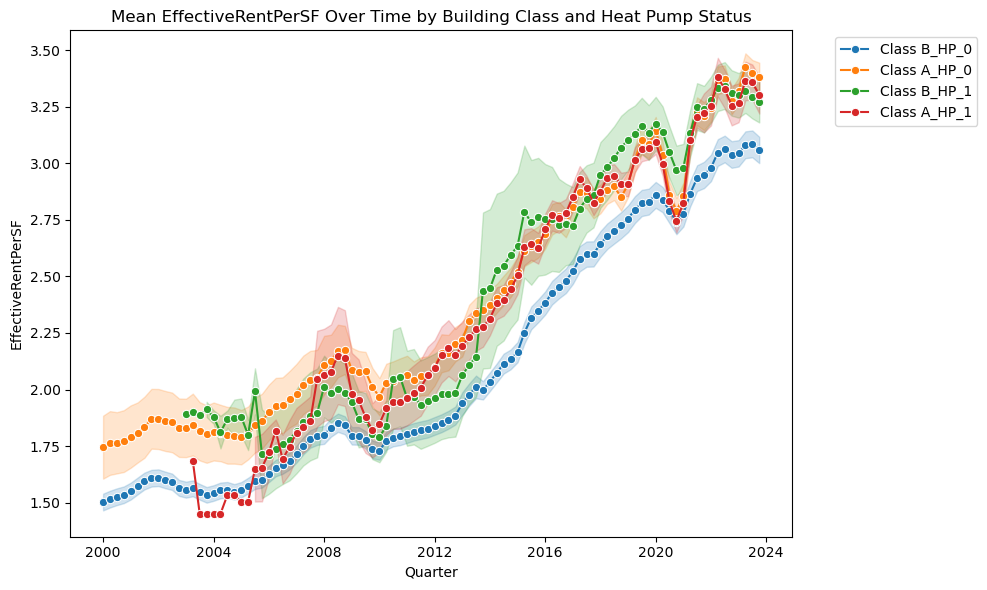

In [71]:
# Mean Asking Rent
plot_rent_trends(data_apt_time, y_var='AskingRentPerSF', estimator='mean')

# Median Asking Rent
plot_rent_trends(data_apt_time, y_var='AskingRentPerSF', estimator='median')

# Mean Effective Rent
plot_rent_trends(data_apt_time, y_var='EffectiveRentPerSF', estimator='mean')


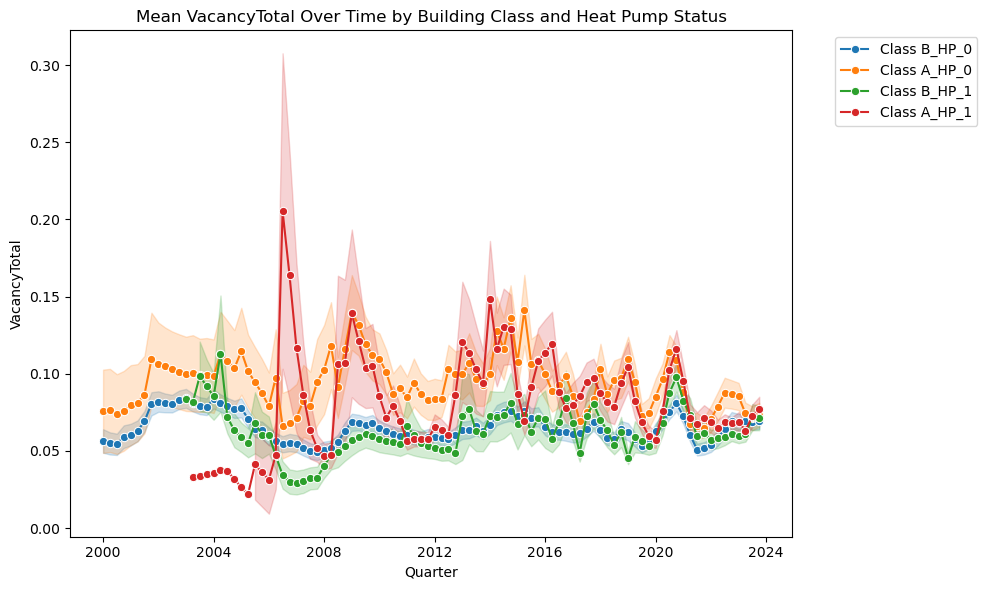

VacancyUnits  VacancyTotal
32179        0.9466      0.036408
42708        0.0000      0.000000
24391        0.0000      0.000000
36449       32.5046      0.087613
42540        1.3151      0.034608

In [72]:
## check if vacancy rate has any difference between buildings with and without heat pumps
plot_rent_trends(data_apt_time, y_var='VacancyTotal', estimator='mean')
t= data_apt_time.columns.str.contains('vacancy', case=False, regex=True)
data_apt_time.loc[:, t].head()


## Combine with census Tract and NB Map to see how the ratio of HP installed in time


In [29]:
## read shp file of Seattle neighborhoods and census tracts
import geopandas as gpd
seattle_neighborhoods = gpd.read_file('01Data\\Neighborhood_Map_Atlas_Neighborhoods\\Neighborhood_Map_Atlas_Neighborhoods.shp')
seattle_neighborhoods = seattle_neighborhoods.to_crs(epsg=4326)  # Ensure it's in WGS84
seattle_tracts = gpd.read_file('01Data\\2020_Census_Tracts_Seattle_8661193084158732132\\tract20_king_county.shp')
seattle_tracts = seattle_tracts.to_crs(epsg=4326)  # Ensure it's in WGS84
seattle_tracts.head()
seattle_neighborhoods.head()

GEOID20  GROSS_ACRE  LAND_ACRES  WATER_ACRE                NAME  \
0  53033000402  444.493643  444.527261    0.000000   Census Tract 4.02   
1  53033000403  180.930716  165.408389   15.535762   Census Tract 4.03   
2  53033000700  319.838996  319.862596    0.000000      Census Tract 7   
3  53033003302  154.942826  154.952619    0.000000  Census Tract 33.02   
4  53033003601  166.571397  166.583375    0.000000  Census Tract 36.01   

   TRACT_NUMB BASENAME               UVDA_AREA  CRA_NO  CRA_GRP  \
0         402     4.02     Bitter Lake Village     9.1        9   
1         403     4.03     Bitter Lake Village     9.1        9   
2         700        7               Lake City     8.2        8   
3        3302    33.02                 Ballard    10.2       10   
4        3601    36.01  Green Lake - Roosevelt     9.4        9   

                       GEN_ALIAS  \
0          Broadview/Bitter Lake   
1          Broadview/Bitter Lake   
2  Olympic Hills/Victory Heights   
3               Whittier Heights   
4                     Green Lake   

                                          DETL_NAMES  C_DISTRICT  \
0                             Broadview, Bitter Lake           5   
1                             Broadview, Bitter Lake           5   
2  Lake City, Victory Heights, Olympic Hills, Pin...           5   
3        Whittier Heights, Loyal Heights, Crown Hill           6   
4     Green Lake, Meridian, Roosevelt, Woodland Park           6   

                                            geometry  
0  POLYGON ((-122.34816 47.72322, -122.34738 47.7...  
1  POLYGON ((-122.35559 47.73414, -122.35558 47.7...  
2  POLYGON ((-122.30729 47.71937, -122.30645 47.7...  
3  POLYGON ((-122.36605 47.67956, -122.36599 47.6...  
4  POLYGON ((-122.31738 47.67584, -122.31738 47.6...

OBJECTID         L_HOOD            S_HOOD     S_HOOD_ALT    Shape__Are  \
0        27        Ballard     Loyal Heights           None  2.132066e+07   
1        28        Ballard           Ballard          Adams  2.255213e+07   
2        29        Ballard  Whittier Heights           None  1.419569e+07   
3        30        Ballard     West Woodland           None  2.219937e+07   
4        31  North Central     Phinney Ridge  Woodland Park  3.212312e+07   

     Shape__Len                                           geometry  
0  18831.009596  POLYGON ((-122.37635 47.67592, -122.37672 47.6...  
1  29926.339300  POLYGON ((-122.37623 47.66819, -122.37623 47.6...  
2  15934.439266  POLYGON ((-122.37635 47.67592, -122.37653 47.6...  
3  21789.651087  POLYGON ((-122.37635 47.67592, -122.3761 47.67...  
4  27120.785938  POLYGON ((-122.34732 47.66501, -122.34888 47.6...

In [30]:
## use the latest Quarter_ts data for mapping
latest_data = data_apt_time[data_apt_time['Quarter_ts'] == data_apt_time['Quarter_ts'].max()]
latest_data['HP_installed'].value_counts()
### intersect the latest_data with seattle_tracts to get the census tract for each apartment and count the number of apartments with and without heat pump in each census tract
gdf_latest = gpd.GeoDataFrame(
    latest_data,
    geometry=gpd.points_from_xy(latest_data.longitude, latest_data.latitude),
    crs="EPSG:4326"
)   
gdf_latest1 = gpd.sjoin(gdf_latest, seattle_tracts[['geometry', 'GEOID20']], how='left', predicate='within')

HP_installed
0    601
1    342
Name: count, dtype: int64

In [31]:

tract_hp_counts = gdf_latest1.groupby(['GEOID20', 'HP_installed']).size().unstack(fill_value=0)
tract_hp_counts['total'] = tract_hp_counts.sum(axis=1)
tract_hp_counts['hp_ratio'] = tract_hp_counts[1] / tract_hp_counts['total']
tract_hp_counts = tract_hp_counts.reset_index()
tract_hp_counts['total'].describe()
## merge tract_hp_counts with seattle_tracts to get the geometry for each census tract
seattle_tracts_hp = seattle_tracts.merge(tract_hp_counts, left_on='GEOID20', right_on='GEOID20', how='left')
seattle_tracts_hp.head()
gdf_latest_nb = gpd.sjoin(gdf_latest, seattle_neighborhoods[['geometry', 'S_HOOD']], how='left', predicate='within')


count    151.000000
mean       6.245033
std        4.958450
min        1.000000
25%        2.500000
50%        5.000000
75%        9.000000
max       26.000000
Name: total, dtype: float64

GEOID20  GROSS_ACRE  LAND_ACRES  WATER_ACRE                NAME  \
0  53033000402  444.493643  444.527261    0.000000   Census Tract 4.02   
1  53033000403  180.930716  165.408389   15.535762   Census Tract 4.03   
2  53033000700  319.838996  319.862596    0.000000      Census Tract 7   
3  53033003302  154.942826  154.952619    0.000000  Census Tract 33.02   
4  53033003601  166.571397  166.583375    0.000000  Census Tract 36.01   

   TRACT_NUMB BASENAME               UVDA_AREA  CRA_NO  CRA_GRP  \
0         402     4.02     Bitter Lake Village     9.1        9   
1         403     4.03     Bitter Lake Village     9.1        9   
2         700        7               Lake City     8.2        8   
3        3302    33.02                 Ballard    10.2       10   
4        3601    36.01  Green Lake - Roosevelt     9.4        9   

                       GEN_ALIAS  \
0          Broadview/Bitter Lake   
1          Broadview/Bitter Lake   
2  Olympic Hills/Victory Heights   
3               Whittier Heights   
4                     Green Lake   

                                          DETL_NAMES  C_DISTRICT  \
0                             Broadview, Bitter Lake           5   
1                             Broadview, Bitter Lake           5   
2  Lake City, Victory Heights, Olympic Hills, Pin...           5   
3        Whittier Heights, Loyal Heights, Crown Hill           6   
4     Green Lake, Meridian, Roosevelt, Woodland Park           6   

                                            geometry    0    1  total  \
0  POLYGON ((-122.34816 47.72322, -122.34738 47.7...  3.0  2.0    5.0   
1  POLYGON ((-122.35559 47.73414, -122.35558 47.7...  2.0  1.0    3.0   
2  POLYGON ((-122.30729 47.71937, -122.30645 47.7...  3.0  0.0    3.0   
3  POLYGON ((-122.36605 47.67956, -122.36599 47.6...  3.0  0.0    3.0   
4  POLYGON ((-122.31738 47.67584, -122.31738 47.6...  4.0  1.0    5.0   

   hp_ratio  
0  0.400000  
1  0.333333  
2  0.000000  
3  0.000000  
4  0.200000

In [32]:
## do something similar for neighborhoods

neighborhood_hp_counts = gdf_latest_nb.groupby(['S_HOOD', 'HP_installed']).size().unstack(fill_value=0)
neighborhood_hp_counts['total'] = neighborhood_hp_counts.sum(axis=1)
neighborhood_hp_counts['hp_ratio'] = neighborhood_hp_counts[1] / neighborhood_hp_counts['total']
neighborhood_hp_counts = neighborhood_hp_counts.reset_index()
neighborhood_hp_counts.head(80)
## join neighborhood_hp_counts with seattle_neighborhoods to get the geometry for each neighborhood
seattle_neighborhoods_hp = seattle_neighborhoods.merge(neighborhood_hp_counts, left_on='S_HOOD', right_on='S_HOOD', how='left')

HP_installed            S_HOOD   0   1  total  hp_ratio
0                         Alki   2   0      2  0.000000
1                     Atlantic  14   5     19  0.263158
2                      Ballard  26  11     37  0.297297
3                     Belltown  29  22     51  0.431373
4                  Bitter Lake   6   3      9  0.333333
..                         ...  ..  ..    ...       ...
71               West Woodland   7   0      7  0.000000
72                    Westlake   7   7     14  0.500000
73            Whittier Heights   1   2      3  0.666667
74                  Windermere   2   0      2  0.000000
75              Yesler Terrace  23   4     27  0.148148

[76 rows x 5 columns]

In [41]:
## create a function to plot the map of Seattle with heat pump ratio by census tract or neighborhood
import matplotlib.pyplot as plt
def plot_heat_pump_map(geodf, geo_col='geometry', ratio_col='hp_ratio', title='Heat Pump Installation Ratio by Area',anno = None):
    """
    Plots a choropleth map showing heat pump installation ratio.
    
    Parameters:
    - geodf: GeoDataFrame containing geometry and heat pump ratio
    - geo_col: column name for geometry
    - ratio_col: column name for heat pump installation ratio
    - title: title of the plot
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 18))
    geodf.plot(column=ratio_col, ax=ax, legend=True,
               legend_kwds={'label': "Heat Pump Installation Ratio",
                            'orientation': "horizontal"},
               cmap='OrRd', missing_kwds={"color": "lightgrey",
                                           "edgecolor": "red",
                                           "hatch": "///",
                                           "label": "No data"})
    ## add text to the plot from geodf variable anno
    if anno is not None:
        for _, row in geodf.iterrows():
            ax.annotate(
                text=row[anno],  # label text
                xy=row['geometry'].centroid.coords[0],  # annotation position
                ha='center',
                fontsize=6
            )

    ax.set_title(title, fontsize=15)
    ax.set_axis_off()
    plt.show()

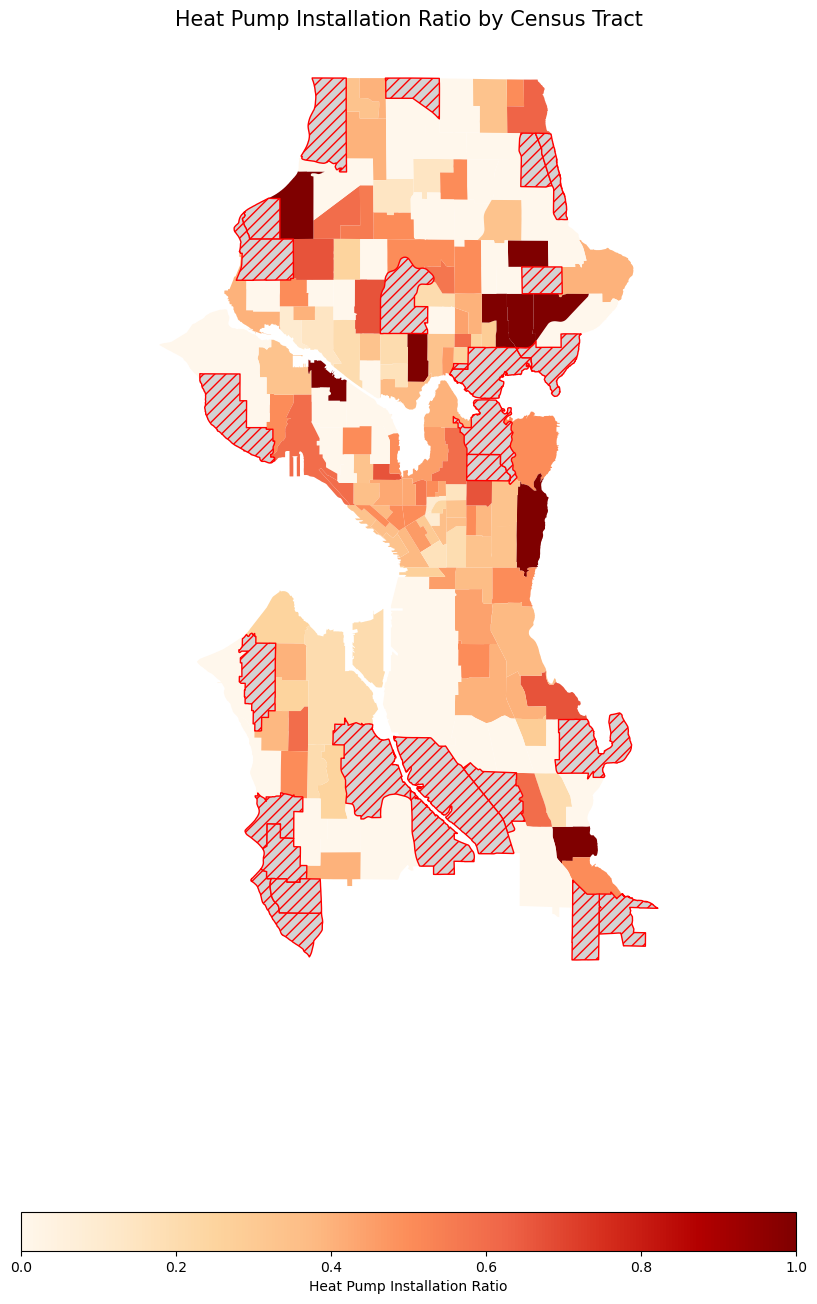

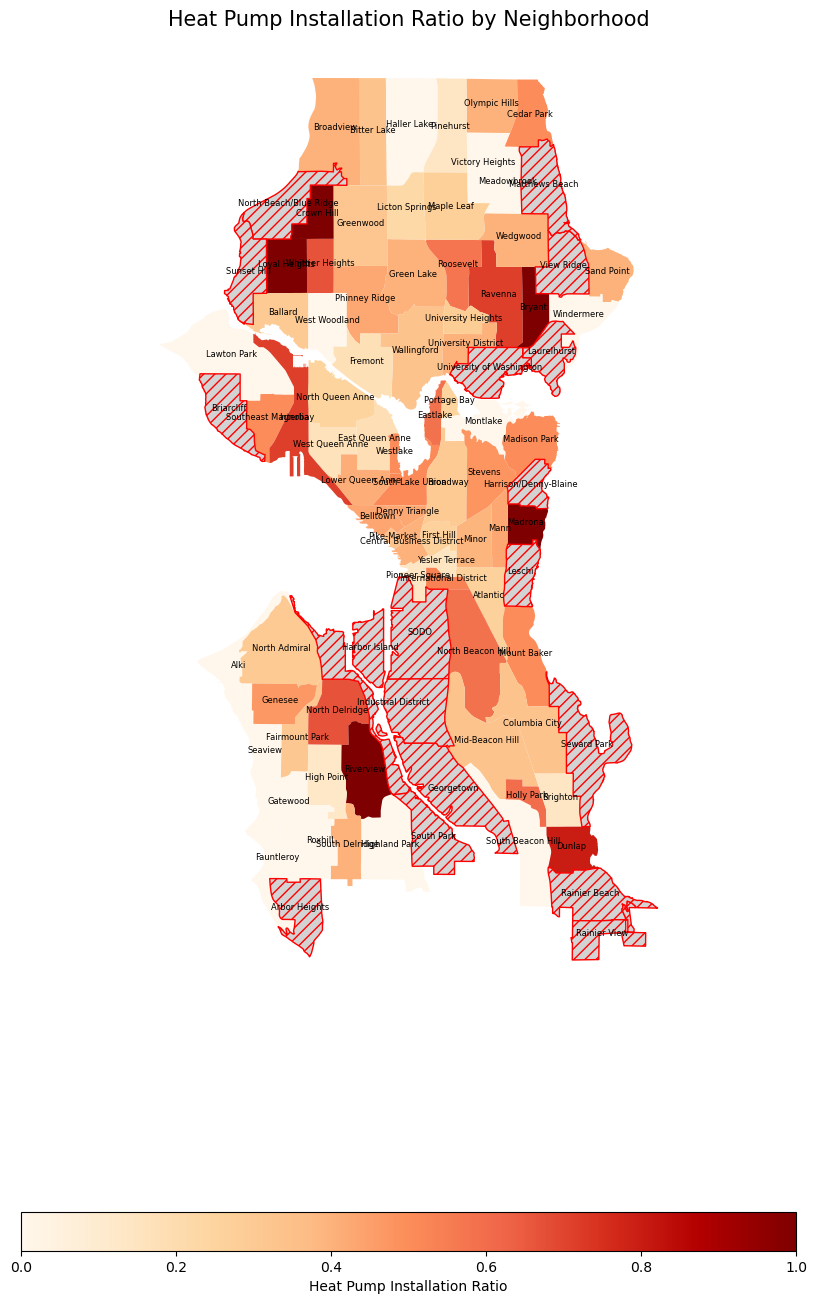

In [42]:
## plot the map by census tract
plot_heat_pump_map(seattle_tracts_hp, geo_col='geometry', ratio_col='hp_ratio', title='Heat Pump Installation Ratio by Census Tract')
## plot the map by neighborhood
plot_heat_pump_map(seattle_neighborhoods_hp, geo_col='geometry', ratio_col='hp_ratio', title='Heat Pump Installation Ratio by Neighborhood', anno='S_HOOD')

## Heat Map of Distribution of Market

In [37]:

# Add a marker and make sure the df_has_hp markers are in green and larger

for idx, row in df_no_hp.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,  # Smaller radius for red markers
        popup=f"Address: {row['addr_clean']}", #, Year HP Installed: {row['Completed Date']}
        color='red',
        weight=0.2,
        fill=True,
        fill_color='red',
        fill_opacity=0.1
    ).add_to(m)

for idx, row in df_has_hp.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,  # Larger radius for green markers
        popup=f"Address: {row['addr_clean']}" ,# Year HP Installed: {row['Completed Date']}",
        color='green',
        weight =0.5,
        fill=True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(m)

## add a legend for different colors
folium.LayerControl().add_to(m)

# Display in Jupyter or  save to HTML
m.save('map.html')

# seattle_map = gpd.read_file(gd.get_path('naturalearth_lowres'))
# seattle_map = seattle_map[seattle_map.name == "United States of America"]


In [38]:
## make a heat map for apartments with heat pumps
from folium.plugins import HeatMap
heat_data = [[row['latitude'], row['longitude']] for index, row in df_has_hp.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('heatmap.html')

## Do a detrend analysis for the price


In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL, seasonal_decompose

# Adjust these to your cadence
FREQ = 'QS'       # monthly start ('MS'); use 'W' for weekly, 'Q' for quarterly, etc.
PERIOD = 4      # season length for monthly
MIN_OBS_FOR_STL = PERIOD*2 + 3   # e.g., at least ~11 quarters
MAX_GAP_INTERP   = 1             # interpolate only very short gaps
MAP_TOLERANCE    = pd.Timedelta('120D')  # map residuals back to raw rows

def detrend_one_address(g, ycol='AskingRentPerSF'):
    g = g.copy()

    # 0) basic clean
    y = pd.to_numeric(g[ycol], errors='coerce').replace([np.inf, -np.inf], np.nan)
    g[ycol] = y
    g = g.dropna(subset=[ycol])
    if g.empty:
        g['y_detrended'] = np.nan
        return g

    # 1) regularize time axis: index and resample to quarterly
    s = (g.set_index('Quarter_ts')[ycol]
           .groupby(level=0).mean())  # collapse duplicates if any
    # if s empty, bail early
    if s.empty:
        g['y_detrended'] = np.nan
        return g

    s = s.asfreq(FREQ)  # enforce regular quarterly spacing

    # 2) handle short gaps cautiously
    s_interp = s.interpolate(limit_direction='both', limit=MAX_GAP_INTERP)

    # If everything became NaN (possible with all-NaN or 1-point), bail
    if s_interp.dropna().empty:
        # fallback: center by mean within group
        out = g.set_index('Quarter_ts')
        out['y_detrended'] = (out[ycol] - out[ycol].mean())
        return out.reset_index()

    # 3) Try STL if enough data & no NaNs remain; else OLS trend or diff
    can_do_stl = (s_interp.isna().sum() == 0) and (len(s_interp) >= MIN_OBS_FOR_STL)
    if can_do_stl:
        try:
            stl = STL(s_interp, period=PERIOD, robust=True)
            res = stl.fit()
            resid = res.resid
        except Exception:
            # fallback to OLS detrend
            t = np.arange(len(s_interp))
            mdl = sm.OLS(s_interp.values, sm.add_constant(t)).fit()
            resid = pd.Series(mdl.resid, index=s_interp.index)
    else:
        # If very short, first-difference; otherwise OLS detrend
        if len(s_interp.dropna()) < PERIOD + 3:
            resid = s_interp.diff().fillna(0.0)
        else:
            s_filled = s_interp.fillna(method='ffill').fillna(method='bfill')
            t = np.arange(len(s_filled))
            mdl = sm.OLS(s_filled.values, sm.add_constant(t)).fit()
            resid = pd.Series(mdl.resid, index=s_filled.index)

    # 4) Map residuals back to original rows by nearest quarter timestamp
    out = g.set_index('Quarter_ts')
    out['y_detrended'] = resid.reindex(out.index, method='nearest', tolerance=MAP_TOLERANCE)

    # last-resort fill for any unmapped timestamps
    m = out['y_detrended'].isna()
    if m.any():
        out.loc[m, 'y_detrended'] = (out.loc[m, ycol] - out[ycol].mean())

    return out.reset_index()

# (Optional) pre-filter to avoid pathological groups with almost no data
df = df.groupby('addr_clean').filter(lambda gg: gg['AskingRentPerSF'].notna().sum() >= 3)

# Apply per address
df = df.groupby('addr_clean', group_keys=False).apply(detrend_one_address, ycol='AskingRentPerSF')
# --- Apply per address ---


NameError: name 'df' is not defined

In [ ]:
## for detrended AskingRentPerSF, find association with HP_installed
import statsmodels.api as sm
df = df.dropna(subset=['y_detrended', 'HP_installed'])
X = sm.add_constant(df['HP_installed'])
model = sm.OLS(df['y_detrended'], X).fit()
print(model.summary())
## the coefficient of HP_installed shows the average difference in detrended AskingRentPerSF between apartments with and without heat pumps


                            OLS Regression Results                            
Dep. Variable:            y_detrended   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06357
Date:                Thu, 06 Nov 2025   Prob (F-statistic):              0.801
Time:                        13:46:19   Log-Likelihood:                 42933.
No. Observations:               41425   AIC:                        -8.586e+04
Df Residuals:                   41423   BIC:                        -8.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0003      0.000     -0.735   

Class_x          A      B
HP_installed             
0             6893  25721
1             5055   3756
Chi-square: 4436.39, p-value: 0.0000
Cramér's V: 0.327


<Axes: xlabel='Class_x', ylabel='HP_installed'>

Text(0.5, 1.0, 'Heat pump installation vs. Class_X')

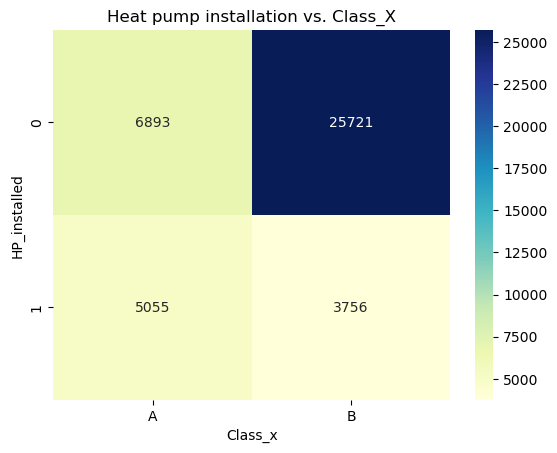

In [ ]:
## check if there is association with HP_installed and Class_x
import pandas as pd

ct = pd.crosstab(df['HP_installed'], df['Class_x'])
print(ct)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")

import numpy as np

n = ct.to_numpy().sum()
phi2 = chi2 / n
r, k = ct.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))
print(f"Cramér's V: {cramers_v:.3f}")


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heat pump installation vs. Class_X')
plt.show()


Class_x          A      B
HP_installed             
0             6893  25721
1             5055   3756
Chi-square: 4436.39, p-value: 0.0000
Cramér's V: 0.327

-- There is a moderate association between the HP installed and the Building classes

